## QUESTION 1

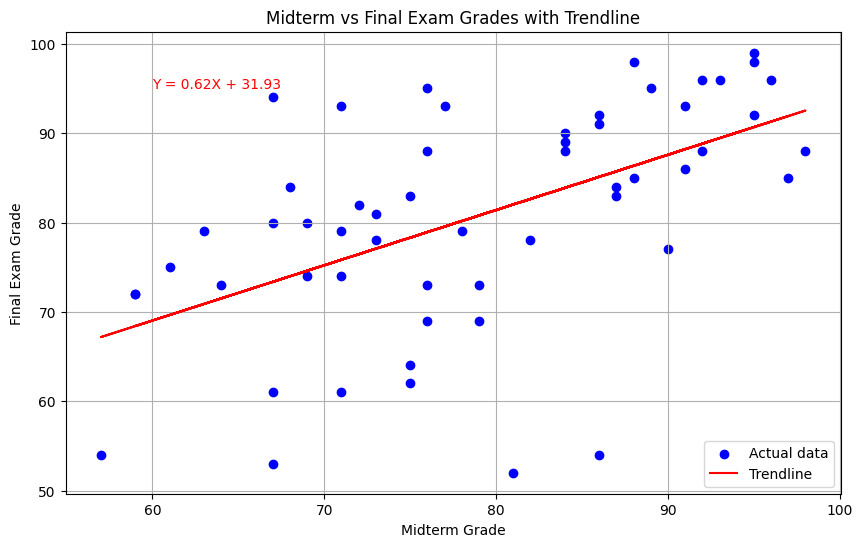

'Y = 31.926 + 0.618X'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Input string data for student grades
data_str = """
Student	Midterm	Final Exam
1	75	64
2	84	90
3	79	69
4	87	83
5	75	62
6	67	80
7	76	73
8	95	92
9	67	61
10	91	86
11	81	52
12	87	84
13	86	54
14	64	73
15	92	88
16	76	88
17	69	80
18	91	93
19	78	79
20	59	72
21	68	84
22	71	74
23	61	75
24	67	53
25	76	95
26	73	78
27	98	88
28	57	54
29	82	78
30	73	81
31	76	69
32	95	99
33	71	93
34	71	79
35	72	82
36	96	96
37	71	61
38	88	85
39	93	96
40	84	89
41	59	72
42	67	94
43	97	85
44	84	88
45	88	98
46	92	96
47	77	93
48	86	92
49	90	77
50	75	83
51	95	98
52	79	73
53	63	79
54	69	74
55	86	91
56	89	95
"""

data_str = data_str.replace("\t",",")

# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Midterm'].values.reshape(-1, 1)  # Midterm grades
y = data['Final Exam'].values  # Final Exam grades

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict final exam scores based on midterm scores
y_pred = model.predict(X)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Midterm'], data['Final Exam'], color='blue', label='Actual data')
plt.plot(data['Midterm'], y_pred, color='red', label='Trendline')

# Add labels and title
plt.xlabel('Midterm Grade')
plt.ylabel('Final Exam Grade')
plt.title('Midterm vs Final Exam Grades with Trendline')

# Add the trendline equation
slope = model.coef_[0]
intercept = model.intercept_
plt.text(60, 95, f'Y = {slope:.2f}X + {intercept:.2f}', color='red')

# Display the scatter plot
plt.legend()
plt.grid(True)
plt.show()

# Predict the final exam grade for a student who scored 78 on the midterm
midterm_score = 76

predicted_final_grade = model.predict([[midterm_score]])


# Output the slope and intercept rounded to three decimal places
slope_rounded = round(slope, 3)
intercept_rounded = round(intercept, 3)

model_equation = f"Y = {intercept_rounded} + {slope_rounded}X"
model_equation



In [4]:
# Round the predicted final exam grade to the nearest whole number
predicted_final_grade_rounded = round(predicted_final_grade[0])
predicted_final_grade_rounded


79

## QUESTION 2

Error Category
-15,000 < e_i ≤ -10,000     0
-10,000 < e_i ≤ -5,000      7
-5,000 < e_i ≤ 0           18
0 < e_i ≤ 5,000             9
5,000 < e_i ≤ 10,000        7
10,000 < e_i ≤ 15,000       0
15,000 < e_i ≤ 20,000       1
Name: count, dtype: int64


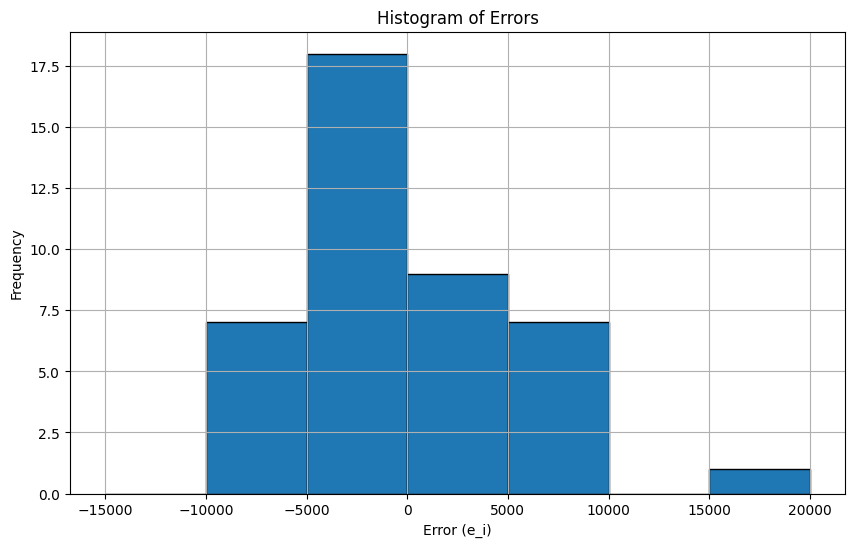

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input string data for square feet and market values
data_str = """
Square Feet	Market Value
1811	104400
1912	104300
1844	93300
1810	90900
1837	102000
2028	108600
1734	87700
1850	95900
1791	89200
1667	88400
1852	100800
1620	96700
1694	87600
2371	113900
2374	113200
1665	87600
2123	116100
1620	94700
1733	86300
1664	87200
1520	83300
1483	79700
1589	81600
1597	87200
1485	82500
1483	78900
1518	87600
1703	94100
1484	82000
1467	88000
1521	88100
1520	88500
1483	76500
1518	84300
1669	90800
1590	81000
1782	91400
1484	81300
1522	100700
1520	87200
1682	96800
1580	87000
"""
data_str = data_str.replace("\t",",")
# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Define the regression model given in the prompt: Market Value = 28750 + 37.013 * Square Feet
def predicted_market_value(square_feet):
    return 27516 + 37.804 * square_feet

# Calculate predicted market values
data['Predicted Market Value'] = data['Square Feet'].apply(predicted_market_value)

# Calculate errors (e_i = Y_i - Ŷ_i)
data['Error'] = data['Market Value'] - data['Predicted Market Value']

# Create frequency distribution for the errors
bins = [-15000, -10000, -5000, 0, 5000, 10000, 15000, 20000]
labels = ['-15,000 < e_i ≤ -10,000', '-10,000 < e_i ≤ -5,000', '-5,000 < e_i ≤ 0',
          '0 < e_i ≤ 5,000', '5,000 < e_i ≤ 10,000', '10,000 < e_i ≤ 15,000', '15,000 < e_i ≤ 20,000']
data['Error Category'] = pd.cut(data['Error'], bins=bins, labels=labels)

# Frequency distribution of the errors
frequency_distribution = data['Error Category'].value_counts().sort_index()

# Display the frequency distribution in the console
print(frequency_distribution)

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(data['Error'], bins=bins, edgecolor='black')
plt.xlabel('Error (e_i)')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.grid(True)
plt.show()


## QUESTION 3

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Input data for overhead costs and billable hours
data_str = """
Overhead Costs	Billable Hours
395000	4000
445000	5000
470000	6000
523000	7000
590000	8000
615000	9000
"""

data_str = data_str.replace("\t",",")

# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Billable Hours'].values.reshape(-1, 1)  # Independent variable (Billable Hours)
y = data['Overhead Costs'].values  # Dependent variable (Overhead Costs)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the constant (intercept) and coefficient (slope)
constant = round(model.intercept_, 1)
coefficient = round(model.coef_[0], 4)

# Output the model equation
constant, coefficient

print(f"Overhead=  {constant} Costs× {coefficient} Billable Hours")
print(constant)
print(coefficient)


Overhead=  211419.0 Costs× 45.3714 Billable Hours
211419.0
45.3714


## Part B

It is not appropriate to interpret b 0​, because its value is the predicted overhead costs for  0 billable​ hours, but someone with 0 billable hours would not actually be a client of the firm.

## Part C

For each increase of 1 unit in billable​ hours, the predicted overhead costs are estimated to increase by b 1.

## part D

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Input data for overhead costs and billable hours
# data_str = """
# Overhead Costs	Billable Hours
# 355000	3000
# 400000	4000
# 430000	5000
# 482000	6000
# 560000	7000
# 575000	8000
# """
data_str = data_str.replace("\t",",")
# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Billable Hours'].values.reshape(-1, 1)  # Independent variable (Billable Hours)
y = data['Overhead Costs'].values  # Dependent variable (Overhead Costs)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Define the number of billable hours for the special job
billable_hours_special_job = 6500

# Use the regression model to predict the overhead costs for 8500 billable hours
predicted_overhead_special_job = model.predict([[billable_hours_special_job]])

# Define the margin before overhead for the special job
margin_before_overhead = 270000

# Calculate if the job would be attractive (margin - predicted overhead costs)
profit_or_loss = margin_before_overhead - predicted_overhead_special_job[0]

# Determine if the job is attractive (profitable) or not
is_attractive = profit_or_loss > 0

predicted_overhead_special_job[0], is_attractive, round(profit_or_loss, 2)

print(round(predicted_overhead_special_job[0]))


506333


## QUESTION 4


### PART A

ALL ARE POSITIVE


### PART B

EITHER 2 OR 3


## QUESTION 5

In [8]:
# Python code to compute the regressions and present a tidy dynamic Q&A output.
# This code will:
# - Read the supplied Concert Sales data
# - Fit three OLS models: Sales ~ RadioTV, Sales ~ Newspaper, Sales ~ RadioTV + Newspaper
# - Extract coefficients, R-squared, Significance F (model F-test p-value), variable p-values
# - Print answers to the user's numbered parts in a clear, labeled format
# The code tries to use statsmodels when available and falls back to numpy for coefficients and R^2
# if statsmodels is not installed. It attempts to compute p-values and F-statistics when possible,
# and will clearly indicate if those statistics could not be computed in the fallback scenario.

import textwrap
import pandas as pd
import numpy as np
from io import StringIO

data_str = """
Sales ($1000)	Thousands of radio and TV ads	Thousands of newspaper ads
1111	0	41
989	0	40
877	24	25
605	25	26
945	32	31
974	31	30
978	35	36
1184	35	35
852	41	24
971	38	25
1675	46	45
1644	46	44
1032	49	49
910	51	53
1342	57	20
1264	57	20
1416	61	30
1496	63	31
1580	65	36
1797	68	33
1895	68	42
1700	73	41
"""

# Read data into DataFrame
data = pd.read_csv(StringIO(data_str.replace("\t",",")))
data.columns = [c.strip() for c in data.columns]

y = data['Sales ($1000)']

# Helper to format floats
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

# Try to use statsmodels for full statistics; if not available, fallback.
use_sm = True
try:
    import statsmodels.api as sm
except Exception as e:
    use_sm = False

results = {}

def fit_with_statsmodels(X, y):
    Xc = sm.add_constant(X)
    model = sm.OLS(y, Xc).fit()
    # collect outputs
    return {
        'model': model,
        'params': model.params.to_dict(),
        'rsquared': model.rsquared,
        'f_pvalue': model.f_pvalue,
        'f_value': getattr(model, 'fvalue', None),
        'pvalues': model.pvalues.to_dict()
    }

def fit_with_numpy(X, y):
    # Add intercept
    Xc = np.column_stack([np.ones(len(X)), np.array(X)])
    beta, *_ = np.linalg.lstsq(Xc, y, rcond=None)
    yhat = Xc.dot(beta)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    rsq = 1 - ss_res/ss_tot
    # No p-values or F available reliably without statsmodels/scipy; return None for them
    params = dict(zip(['const'] + (list(X.columns) if hasattr(X, 'columns') else ['x'+str(i) for i in range(1, X.shape[1]+1)]),
                      beta))
    return {
        'model': None,
        'params': params,
        'rsquared': rsq,
        'f_pvalue': None,
        'f_value': None,
        'pvalues': None
    }

# Fit Radio&TV only
X_radio = data[['Thousands of radio and TV ads']]
if use_sm:
    res_radio = fit_with_statsmodels(X_radio, y)
else:
    res_radio = fit_with_numpy(X_radio, y)
results['radio'] = res_radio

# Fit Newspaper only
X_news = data[['Thousands of newspaper ads']]
if use_sm:
    res_news = fit_with_statsmodels(X_news, y)
else:
    res_news = fit_with_numpy(X_news, y)
results['news'] = res_news

# Fit both predictors
X_both = data[['Thousands of radio and TV ads','Thousands of newspaper ads']]
if use_sm:
    res_both = fit_with_statsmodels(X_both, y)
else:
    res_both = fit_with_numpy(X_both, y)
results['both'] = res_both

# Build dynamic Q&A output
out_lines = []
out_lines.append("Regression analysis of Concert Sales (in $1000)")
out_lines.append("="*60)
out_lines.append("")

# Part 2: Radio&TV simple model
r = results['radio']
coef0 = r['params'].get('const', r['params'].get('const', None))
slope = r['params'].get('Thousands of radio and TV ads') if 'Thousands of radio and TV ads' in r['params'] else list(r['params'].values())[1]

print("\n Part 1: State the hypotheses for the multiple linear regression test.\n Upper H 0​: β_1 = 0 \n Upper H 1​: β_1 ≠ 0")

out_lines.append("Part 2: Model predicting ConcertSales as a function of Radio&TV:")
out_lines.append(f"  ConcertSales = {r3(coef0)} + ({r3(slope)}) * Radio&TV")
out_lines.append("")

out_lines.append("Part 3: Radio&TV simple regression R-squared:")
out_lines.append(f"  R-squared = {r3(r['rsquared'])}   => {r3(r['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variable.")
out_lines.append("")

out_lines.append("Part 4: Significance F (Radio&TV model):")
out_lines.append(f"  Significance F (model f-test p-value) = {r3(r['f_pvalue']) if r['f_pvalue'] is not None else 'N/A (statsmodels not available)'}")
out_lines.append("")

out_lines.append("Part 5: Radio&TV variable p-value:")
pv_radio = r['pvalues'].get('Thousands of radio and TV ads') if r['pvalues'] else None
out_lines.append(f"  Radio&TV p-value = {r3(pv_radio) if pv_radio is not None else 'N/A'}")
out_lines.append("")
if pv_radio is not None and r['f_pvalue'] is not None:
    less = (pv_radio < 0.05 and r['f_pvalue'] < 0.05)
    out_lines.append("  Decision at alpha = 0.05:")
    if less:
        out_lines.append("    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Radio&TV is significant.")
    else:
        out_lines.append("    Since p-value and/or Significance F are greater than 0.05 => fail to reject the null hypothesis. Radio&TV is not significant.")
else:
    out_lines.append("  Decision: Could not compute full test (p-value or Significance F missing).")
out_lines.append("")

# Part 7: Newspaper simple model
rn = results['news']
coef0_n = rn['params'].get('const', None)
slope_n = rn['params'].get('Thousands of newspaper ads') if 'Thousands of newspaper ads' in rn['params'] else list(rn['params'].values())[1]
out_lines.append("Part 7: Model predicting ConcertSales as a function of Newspaper:")
out_lines.append(f"  ConcertSales = {r3(coef0_n)} + ({r3(slope_n)}) * Newspaper")
out_lines.append("")

out_lines.append("Part 8: Newspaper simple regression R-squared:")
out_lines.append(f"  R-squared = {r3(rn['rsquared'])}   => {r3(rn['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variable.")
out_lines.append("")

out_lines.append("Part 9: Significance F (Newspaper model):")
out_lines.append(f"  Significance F = {r3(rn['f_pvalue']) if rn['f_pvalue'] is not None else 'N/A'}")
out_lines.append("")

pv_news = rn['pvalues'].get('Thousands of newspaper ads') if rn['pvalues'] else None
out_lines.append("Part 10: Newspaper p-value:")
out_lines.append(f"  Newspaper p-value = {r3(pv_news) if pv_news is not None else 'N/A'}")
out_lines.append("")
if pv_news is not None and rn['f_pvalue'] is not None:
    less_n = (pv_news < 0.05 and rn['f_pvalue'] < 0.05)
    out_lines.append("  Decision at alpha = 0.05:")
    if less_n:
        out_lines.append("    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Newspaper is significant.")
    else:
        out_lines.append("    Since p-value and/or Significance F are greater than 0.05 => fail to reject the null hypothesis. Newspaper is not significant.")
else:
    out_lines.append("  Decision: Could not compute full test (p-value or Significance F missing).")
out_lines.append("")

# Part 12: Hypotheses for multiple regression
out_lines.append("Part 12: Hypotheses for multiple linear regression test:")
out_lines.append("  H0: β1 = β2 = ... = βk = 0")
out_lines.append("  H1: At least one βj is not 0")
out_lines.append("")

# Part 13: Multiple regression model
rb = results['both']
coef0_b = rb['params'].get('const', None)
slope_r = rb['params'].get('Thousands of radio and TV ads', None)
slope_n_b = rb['params'].get('Thousands of newspaper ads', None)
out_lines.append("Part 13: Model predicting ConcertSales as a function of Radio&TV and Newspaper:")
out_lines.append(f"  ConcertSales = {r3(coef0_b)} + ({r3(slope_r)}) * Radio&TV + ({r3(slope_n_b)}) * Newspaper")
out_lines.append("")

out_lines.append("Part 14: Multiple regression R-squared:")
out_lines.append(f"  R-squared = {r3(rb['rsquared'])}   => {r3(rb['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variables.")
out_lines.append("")

out_lines.append("Part 15: Significance F (multiple model):")
out_lines.append(f"  Significance F = {r3(rb['f_pvalue']) if rb['f_pvalue'] is not None else 'N/A'}")
out_lines.append("")

out_lines.append("Part 16 & 17: Variable p-values in the multiple regression:")
pv_r_b = rb['pvalues'].get('Thousands of radio and TV ads') if rb['pvalues'] else None
pv_n_b = rb['pvalues'].get('Thousands of newspaper ads') if rb['pvalues'] else None
out_lines.append(f"  Radio&TV p-value = {r3(pv_r_b) if pv_r_b is not None else 'N/A'}")
out_lines.append(f"  Newspaper p-value = {r3(pv_n_b) if pv_n_b is not None else 'N/A'}")
out_lines.append("")

if rb['f_pvalue'] is not None:
    out_lines.append("Part 18: Overall model decision at alpha = 0.05:")
    if rb['f_pvalue'] < 0.05:
        out_lines.append("  Since Significance F < 0.05 => reject H0. The overall model is appropriate.")
    else:
        out_lines.append("  Since Significance F >= 0.05 => fail to reject H0. The overall model is not appropriate.")
    # Which variables significant?
    sigs = []
    if pv_r_b is not None and pv_r_b < 0.05:
        sigs.append('Radio&TV')
    if pv_n_b is not None and pv_n_b < 0.05:
        sigs.append('Newspaper')
    if len(sigs)==2:
        out_lines.append("  Both variables are significant in the multiple regression.")
    elif len(sigs)==1:
        out_lines.append(f"  Only {sigs[0]} is significant in the multiple regression.")
    else:
        out_lines.append("  Neither variable is significant in the multiple regression.")
else:
    out_lines.append("Part 18: Could not fully evaluate model-level Significance F (statsmodels not available).")

# Print nicely
print("\n".join(out_lines))

# Also show the raw regression summaries if statsmodels is available
# if use_sm:
#     print("\n\nDetailed statsmodels summaries (trimmed):\n")
#     print("Radio&TV only model summary:\n", results['radio']['model'].summary())
#     print("\nNewspaper only model summary:\n", results['news']['model'].summary())
#     print("\nMultiple regression model summary:\n", results['both']['model'].summary())



 Part 1: State the hypotheses for the multiple linear regression test.
 Upper H 0​: β_1 = 0 
 Upper H 1​: β_1 ≠ 0
Regression analysis of Concert Sales (in $1000)

Part 2: Model predicting ConcertSales as a function of Radio&TV:
  ConcertSales = 700.595 + (12.253) * Radio&TV

Part 3: Radio&TV simple regression R-squared:
  R-squared = 0.473   => 47.335% of the variation in the dependent variable is explained by the independent variable.

Part 4: Significance F (Radio&TV model):
  Significance F (model f-test p-value) = 0.0

Part 5: Radio&TV variable p-value:
  Radio&TV p-value = 0.0

  Decision at alpha = 0.05:
    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Radio&TV is significant.

Part 7: Model predicting ConcertSales as a function of Newspaper:
  ConcertSales = 882.073 + (10.345) * Newspaper

Part 8: Newspaper simple regression R-squared:
  R-squared = 0.069   => 6.936% of the variation in the dependent variable is explained by the independent

## QUESTION 6

In [11]:
"""
home_market_value_qna.py

Purpose:
 - Fit MarketValue = f(Age, Size) using OLS
 - Print numbered parts (hypotheses, model, R^2, Significance F, p-values, decisions)
 - All numeric values rounded to 3 decimals for easy copy/paste

Requirements:
 - pandas
 - statsmodels
"""

import pandas as pd
import statsmodels.api as sm
from io import StringIO

# --- Data (paste as-is) ---
data_str = """
House Age	Square Feet	Market Value
32	1763	90737
31	1826	100365
31	1769	96617
35	1841	87173
32	1775	99068
34	2118	103458
32	1743	86269
35	1886	92836
31	1871	85779
33	1723	87853
34	1808	105353
30	1543	98685
33	1745	87510
31	2465	115580
33	2264	116332
34	1682	90865
34	2177	111886
34	1665	90984
34	1771	86393
31	1602	88325
28	1522	83016
28	1541	81340
27	1568	77942
28	1574	85017
29	1525	81180
28	1442	78373
28	1455	85899
26	1652	91649
28	1453	83265
27	1400	85755
28	1557	84254
27	1579	89483
27	1462	79908
28	1482	82558
27	1662	91476
27	1511	81514
27	1723	92124
28	1509	78038
28	1486	99368
28	1499	88193
28	1712	94646
26	1654	117068
"""
data = pd.read_csv(StringIO(data_str), sep="\t")
data.columns = [c.strip() for c in data.columns]

# --- Fit model ---
y = data['Market Value']
X = data[['House Age', 'Square Feet']]
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()

# --- Helpers for presentation ---
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

alpha = 0.05
const = r3(model.params['const'])
coef_age = r3(model.params['House Age'])
coef_size = r3(model.params['Square Feet'])
r_squared = r3(model.rsquared)
r_squared_pct = r3(model.rsquared * 100)
significance_f = r3(model.f_pvalue)
p_age = r3(model.pvalues['House Age'])
p_size = r3(model.pvalues['Square Feet'])

# --- Print Q&A style results ---
print("\nMultiple Linear Regression: Market Value ~ Age + Size\n" + "="*64 + "\n")

print("Part 1: Hypotheses for the multiple linear regression test:")
print("  H0: β1 = β2 = ... = βk = 0")
print("  H1: At least one βj ≠ 0\n")

print("Part 2: Model predicting MarketValue as a function of Age and Size:")
print(f"  MarketValue = {const} + ({coef_age}) * Age + ({coef_size}) * Size\n")

print("Part 3: R-squared:")
print(f"  R-squared = {r_squared}  => {r_squared_pct}% of the variation in the dependent variable is explained by these independent variables.\n")

print("Part 4: Significance F (model-level p-value):")
print(f"  Significance F = {significance_f}\n")

print("Part 5: Global test decision (alpha = {0}):".format(alpha))
if isinstance(significance_f, float) and significance_f < alpha:
    print("  Since Significance F < alpha, reject the null hypothesis. At least one slope is not 0.\n")
else:
    print("  Since Significance F >= alpha, fail to reject the null hypothesis. No evidence that any slope differs from 0.\n")

print("Part 6: Age p-value:")
print(f"  Age p-value = {p_age}\n")

print("Part 7: Size p-value:")
print(f"  Size p-value = {p_size}\n")

print("Part 8: Variable significance conclusion (alpha = {0}):".format(alpha))
sig_age = isinstance(p_age, float) and p_age < alpha
sig_size = isinstance(p_size, float) and p_size < alpha
if sig_age and sig_size:
    print("  Both Age and Size are significant predictors (reject H0 for both).")
elif sig_age and not sig_size:
    print("  Only Age is significant; Size is not significant.")
elif not sig_age and sig_size:
    print("  Only Size is significant; Age is not significant.")
else:
    print("  Neither Age nor Size is significant at alpha = 0.05.\n")

print("\nConcise numeric summary (rounded to 3 decimals):")
print(f"  model_equation: MarketValue = {const} + ({coef_age})*Age + ({coef_size})*Size")
print(f"  r_squared: {r_squared} ({r_squared_pct}%)")
print(f"  significance_f: {significance_f}")
print(f"  p_value_age: {p_age}")
print(f"  p_value_size: {p_size}")

# print("\n\nFull regression summary (statsmodels):\n")
# print(model.summary())



Multiple Linear Regression: Market Value ~ Age + Size

Part 1: Hypotheses for the multiple linear regression test:
  H0: β1 = β2 = ... = βk = 0
  H1: At least one βj ≠ 0

Part 2: Model predicting MarketValue as a function of Age and Size:
  MarketValue = 47621.84 + (-724.472) * Age + (38.685) * Size

Part 3: R-squared:
  R-squared = 0.564  => 56.382% of the variation in the dependent variable is explained by these independent variables.

Part 4: Significance F (model-level p-value):
  Significance F = 0.0

Part 5: Global test decision (alpha = 0.05):
  Since Significance F < alpha, reject the null hypothesis. At least one slope is not 0.

Part 6: Age p-value:
  Age p-value = 0.15

Part 7: Size p-value:
  Size p-value = 0.0

Part 8: Variable significance conclusion (alpha = 0.05):
  Only Size is significant; Age is not significant.

Concise numeric summary (rounded to 3 decimals):
  model_equation: MarketValue = 47621.84 + (-724.472)*Age + (38.685)*Size
  r_squared: 0.564 (56.382%)
  s

## QUESTION 7

In [19]:
# Importing necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.linear_model import LinearRegression
from io import StringIO

# Original data in string format
data_string = """
House Age	Square Feet	Market Value
33	1781	90137
32	1897	104598
33	1811	89402
32	1818	92034
31	1766	103540
32	2054	106644
32	1722	87956
35	1812	100681
32	1743	90111
34	1733	86871
33	1899	105317
30	1553	99015
31	1664	84810
32	2426	118770
32	2361	112051
35	1709	85436
30	2129	121407
33	1642	94992
34	1798	87872
34	1748	83336
28	1457	80692
27	1529	82124
28	1653	77964
28	1591	85593
27	1464	79162
28	1484	75053
27	1567	87119
28	1692	94673
29	1505	85268
29	1521	90769
29	1488	87357
26	1472	88519
28	1413	75617
28	1564	86007
26	1661	87363
28	1612	84666
29	1872	92428
26	1491	78023
26	1581	98072
28	1568	87074
28	1618	92292
28	1597	119312
"""

# Convert the string into a DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep='\t')

# Check for missing or invalid data

# If there are any NaN values, we drop them (you can also choose to fill them with a specific value)
df.dropna(inplace=True)

# Rename the columns to the desired format
df.columns = ['House_Age', 'Square_Feet', 'Market_Value']

# Define the predictors (Square Feet) and the response variable (Market Value)
X_size_only = df[['Square_Feet']]
y = df['Market_Value']

# Fitting the simple linear regression model
model_size_only = LinearRegression()
model_size_only.fit(X_size_only, y)

# Getting the coefficients and intercept for the model
intercept_size_only = model_size_only.intercept_
coefficient_size_only = model_size_only.coef_[0]

# Predicting for user-input house sizes (in this case, 1700 and 2300)
house_size_1 = 2200
house_size_2 = 3000

# Making predictions
prediction_size_1 = model_size_only.predict([[house_size_1]])
prediction_size_2 = model_size_only.predict([[house_size_2]])

# Outputting the results
print(f"MarketValue = {round(intercept_size_only, 3)} + ({round(coefficient_size_only, 3)}) * Size")
print(f"Prediction for house size {house_size_1}:", round(prediction_size_1[0], 2))
print(f"Prediction for house size {house_size_2}:", round(prediction_size_2[0], 2))


MarketValue = 27949.6 + (37.588) * Size
Prediction for house size 2200: 110642.58
Prediction for house size 3000: 140712.75


## QUESTION 8

In [24]:
# Importing necessary libraries
from io import StringIO
import pandas as pd
from statsmodels.api import OLS, add_constant

# The cleaned string data
data_string = """
Credit Score	Years of Credit History	Revolving Balance ($)	Revolving Utilization (%)
730	20	11420	0.23
578	9	7300	0.71
682	11	20100	0.52
630	15	12900	0.68
532	12	5800	0.77
800	22	9100	0.14
738	7	35300	0.22
625	5	22900	0.64
596	17	16600	0.51
665	24	9300	0.34
705	19	22100	0.16
505	16	12600	0.84
570	6	7800	0.72
625	3	37500	0.88
779	13	6200	0.08
807	10	10600	0.04
645	7	17400	0.57
528	14	27100	0.78
816	20	13500	0.05
768	2	11300	0.72
560	4	2600	0.98
622	9	8500	0.35
647	13	16100	0.23
693	3	3400	0.11
654	12	7600	0.05
700	15	20400	0.24
706	9	11800	0.13
640	7	29200	0.85
512	2	2100	1.00
682	12	7700	0.07
490	5	1100	0.84
587	3	8600	0.63
704	17	12900	0.28
708	22	10100	0.21
590	18	31100	0.79
625	8	16300	0.56
700	16	9800	0.12
779	13	6200	0.06
807	10	10600	0.05
645	7	17400	0.58
541	14	27100	0.77
806	20	13500	0.04
765	2	11300	0.72
572	4	2300	0.97
605	10	12150	0.84
707	11	11800	0.18
641	8	29200	0.83
514	3	2100	0.99
600	18	29100	0.77
738	15	13100	0.25
"""

# Using StringIO to read the string as if it were a file
data = StringIO(data_string)

# Reading the data into a DataFrame with appropriate column names
df = pd.read_csv(data, sep="\t")


# Performing a simple linear regression using only Revolving Utilization (%)
X_utilization_only = df[['Revolving Utilization (%)']]
X_utilization_only = add_constant(X_utilization_only)  # Adding a constant for intercept
y = df['Credit Score']

# Fitting the linear regression model with utilization as the only predictor
model_utilization_only = OLS(y, X_utilization_only).fit()

# Getting the coefficients and intercept for the model
summary_utilization_only = model_utilization_only.summary()

summary_utilization_only


# Extracting the intercept and coefficient for Utilization
intercept_utilization = model_utilization_only.params['const']
coef_utilization = model_utilization_only.params['Revolving Utilization (%)']

# Formatting the equation string
equation = f"Credit Score = {intercept_utilization:.3f} + ({coef_utilization:.3f} × Utilization)"

print("PART  A ANSWER:")
print(equation)

# Performing multiple linear regression using all predictors (Years, Balance, and Utilization)
X_full = df[['Years of Credit History', 'Revolving Balance ($)', 'Revolving Utilization (%)']]
X_full = add_constant(X_full)  # Adding a constant for intercept
y = df['Credit Score']

# Fitting the multiple linear regression model
model_full = OLS(y, X_full).fit()

# Extracting the coefficients and intercept for the correct model
intercept_full = model_full.params['const']
coef_years = model_full.params['Years of Credit History']
coef_balance = model_full.params['Revolving Balance ($)']
coef_utilization_full = model_full.params['Revolving Utilization (%)']

# Formatting the equation string for the full model
equation_full = f"Credit Score = {intercept_full:.3f} + ({coef_years:.3f} × Years) + ({coef_balance:.3f} × Balance) + ({coef_utilization_full:.3f} × Utilization)"

print("\nPART  B ANSWER:")
print(equation_full)




# Calculating the R-squared for the full model (with all predictors)
r_squared_full = model_full.rsquared

# Calculating the R-squared for the simpler model (with only Utilization)
r_squared_utilization_only = model_utilization_only.rsquared

print("\nPART  C ANSWER:")
print(round(r_squared_utilization_only,3))

print(round(r_squared_full,3))





PART  A ANSWER:
Credit Score = 762.800 + (-219.013 × Utilization)

PART  B ANSWER:
Credit Score = 776.425 + (-2.026 × Years) + (0.001 × Balance) + (-243.107 × Utilization)

PART  C ANSWER:
0.629
0.656


## part B



"The first model's \( R^2 \) value is 0.628, which is **less than** the second model's \( R^2 \) value of 0.649. Therefore, based on the \( R^2 \) values, the better model is the **second** model. 

The principle of parsimony **applies** because the \( R^2 \) values **are** close (that is, they differ by **less than** 0.05), so the better model is the **first**."



## QUESTION 9

In [33]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from io import StringIO

# Data in string format
data_string = """
Type	Sales_Price	Lot_Cost
Townhouse	114250	22210
Single Family	138044	27011
Townhouse	149415	26160
Single Family	171510	26710
Townhouse	183426	46535
Townhouse	188900	28510
Single Family	190630	36511
Townhouse	198412	46535
Townhouse	204586	46535
Single Family	207331	40809
Single Family	215715	38010
Townhouse	252310	74910
Single Family	256510	44708
Single Family	269510	44854
Single Family	270010	42609
Single Family	272615	46510
Single Family	279230	46160
Single Family	296500	58510
Single Family	303010	60510
Single Family	308900	47363
Single Family	314408	42278
Single Family	321112	83760
Single Family	325922	64033
Single Family	338884	71909
Single Family	338890	50660
Single Family	339575	56360
Single Family	355627	57732
Single Family	361459	52101
Single Family	433936	58932
Single Family	494330	85632
"""

# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Define the dependent variable (Sales Price) and independent variables (Lot Cost and Townhouse)
X = df[['Lot_Cost', 'Townhouse']]
y = df['Sales_Price']

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the regression coefficients
intercept = round(results.params['const'],)
lot_cost_coeff = round(results.params['Lot_Cost'], 2)
townhouse_coeff = round(results.params['Townhouse'],)

# Print the regression equation in the required format
print(f"Sales Price = {intercept} + ({lot_cost_coeff}) * Lot Cost + ({townhouse_coeff}) * Townhouse")


# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Define the dependent variable (Sales Price) and independent variables (Lot Cost, Townhouse, and interaction)
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define independent variables (Lot Cost, Townhouse, and interaction)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
y = df['Sales_Price']

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
summary = model.summary()


# Extract p-values of the independent variables and the interaction term
p_value_lot_cost = model.pvalues['Lot_Cost']
p_value_townhouse = model.pvalues['Townhouse']
p_value_interaction = model.pvalues['Lot_Cost_Townhouse']

print("\n Part B Answer:")

# Print the p-values
print(f"P-value for Lot Cost: {p_value_lot_cost:.3f}")
print(f"P-value for Townhouse: {p_value_townhouse:.3f}")
print(f"P-value for Lot Cost * Townhouse (Interaction Term): {p_value_interaction:.3f}")

# Determine if an interaction exists based on the p-value of the interaction term
alpha = 0.1
if p_value_interaction < alpha:
    print(f"An interaction exists because the p-value of the interaction term Lot Cost * Townhouse is {p_value_interaction:.3f}, which is less than alpha ({alpha}).")
else:
    print(f"No interaction exists because the p-value of the interaction term Lot Cost * Townhouse is {p_value_interaction:.3f}, which is greater than alpha ({alpha}).")


print("\n Part C Answer:")
# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Create the interaction term between Lot Cost and Townhouse
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define the predictors (Lot Cost, Townhouse, and the interaction term)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
X = sm.add_constant(X)  # Add constant for intercept

# Define the response variable
y = df['Sales_Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model


# Extract the coefficients of the model
intercept = round(model.params['const'], 0)
lot_cost_coeff = round(model.params['Lot_Cost'], 2)
townhouse_coeff = round(model.params['Townhouse'], 0)
interaction_coeff = round(model.params['Lot_Cost_Townhouse'], 2)

# Print the regression equation in the required format
print(f"Sales Price = {intercept} + ({townhouse_coeff}) • Townhouse + ({lot_cost_coeff}) • Lot Cost + ({interaction_coeff}) • Lot Cost • Townhouse")
# Use StringIO to read the string as if it were a file


Sales Price = 106207 + (3.68) * Lot Cost + (-75102) * Townhouse

 Part B Answer:
P-value for Lot Cost: 0.000
P-value for Townhouse: 0.751
P-value for Lot Cost * Townhouse (Interaction Term): 0.091
An interaction exists because the p-value of the interaction term Lot Cost * Townhouse is 0.091, which is less than alpha (0.1).

 Part C Answer:
Sales Price = 76025.0 + (18193.0) • Townhouse + (4.27) • Lot Cost + (-2.1) • Lot Cost • Townhouse


In [32]:
# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame

df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Create the interaction term between Lot Cost and Townhouse
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define the predictors (Lot Cost, Townhouse, and the interaction term)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
X = sm.add_constant(X)  # Add constant for intercept

# Define the response variable
y = df['Sales_Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract the coefficients of the model
intercept = model.params['const']
lot_cost_coeff = model.params['Lot_Cost']
townhouse_coeff = model.params['Townhouse']
interaction_coeff = model.params['Lot_Cost_Townhouse']

# Predicted sales price for a single-family home
def predict_single_family_home(lot_cost):
    townhouse = 0
    lot_cost_townhouse = lot_cost * townhouse
    predicted_price = intercept + (townhouse_coeff * townhouse) + (lot_cost_coeff * lot_cost) + (interaction_coeff * lot_cost_townhouse)
    return predicted_price

# Predicted sales price for a townhouse
def predict_townhouse(lot_cost):
    townhouse = 1
    lot_cost_townhouse = lot_cost * townhouse
    predicted_price = intercept + (townhouse_coeff * townhouse) + (lot_cost_coeff * lot_cost) + (interaction_coeff * lot_cost_townhouse)
    return predicted_price

# Example: Predict sales price for a single-family home with Lot Cost of $40,000
lot_cost_single_family = 30100
predicted_price_single_family = predict_single_family_home(lot_cost_single_family)

# Example: Predict sales price for a townhouse with Lot Cost of $40,000
lot_cost_townhouse = 30100
predicted_price_townhouse = predict_townhouse(lot_cost_townhouse)

# Print the predicted prices, rounded to the nearest cent
print(f"The predicted sales price for a single-family home with a lot cost of ${lot_cost_single_family:,.2f} is: ${round(predicted_price_single_family)}")
print(f"The predicted sales price for a townhouse with a lot cost of ${lot_cost_townhouse:,.2f} is: ${round(predicted_price_townhouse)}")

The predicted sales price for a single-family home with a lot cost of $30,100.00 is: $204573
The predicted sales price for a townhouse with a lot cost of $30,100.00 is: $159478


### QUESTION 10

Cost = 9113 + (14) Units Produced
R-squared: 0.9691


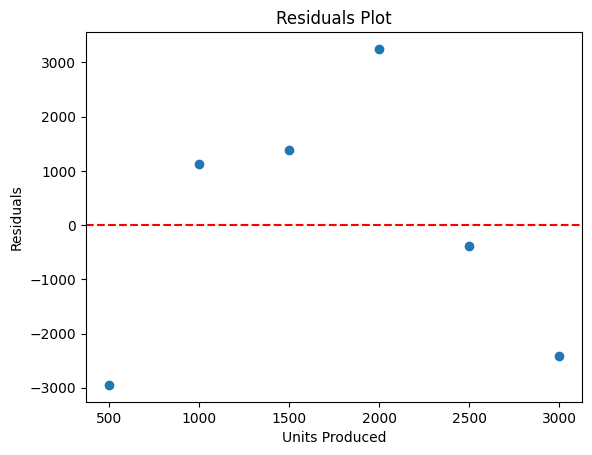

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data in string format
data_string = """
Units_Produced	Cost
500	13,300
1000	24,500
1500	31,900
2000	40,900
2500	44,400
3000	49,500
"""

data_string = data_string.replace(",","").replace("\t",",")

# Convert the data into a pandas DataFrame
from io import StringIO
data = StringIO(data_string)
df = pd.read_csv(data)

# Defining the predictors (Units Produced) and the response variable (Cost)
X = df[['Units_Produced']]  # Predictor
y = df['Cost']  # Response variable

# Applying the Simple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Getting the intercept and slope (coefficient)
intercept = model.intercept_
slope = model.coef_[0]

# Predicting the Cost based on the linear model
y_pred = model.predict(X)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Output the regression equation
print(f"Cost = {round(intercept)} + ({round(slope)}) Units Produced")
print(f"R-squared: {r2:.4f}")


# Residual plot (difference between actual and predicted)
residuals = y - y_pred
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Units Produced')
plt.ylabel('Residuals')
plt.show()


a nonlinear shape.​, cannot

In [43]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data in string format
data_string = """
Units_Produced	Cost
500	13,300
1000	24,500
1500	31,900
2000	40,900
2500	44,400
3000	49,500
"""

data_string = data_string.replace(",","").replace("\t",",")
# Convert the data into a pandas DataFrame
from io import StringIO
data = StringIO(data_string)
df = pd.read_csv(data)

# Defining the predictors (Units Produced) and the response variable (Cost)
X = df[['Units_Produced']]  # Predictor
y = df['Cost']  # Response variable

# Applying Polynomial Features of degree 2 (for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transform X to include X and X^2 (quadratic term)

# Applying the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)

# Getting the coefficients and intercept for the polynomial model
intercept = model.intercept_
coefficients = model.coef_

# Predicting the Cost based on the polynomial model
y_pred = model.predict(X_poly)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Output the regression equation
print(f"Cost = ({round(coefficients[2], 3)}) * Units_Produced^2 + ({round(coefficients[1], 3)}) * Units_Produced + ({round(intercept, 3)})")
print(f"R-squared: {r2:.3f}")




Cost = (-0.003) * Units_Produced^2 + (25.794) * Units_Produced + (1430.0)
R-squared: 0.997


## QUESTION 13

In [1]:
import pandas as pd
import statsmodels.api as sm

# Data for weddings paid by Bride and Groom only
data = {
    'Couple\'s Income': [98000, 72000, 90000, 43000, 100000, 75000, 53000, 45000],
    'Wedding Cost': [47000, 42000, 30500, 30000, 30000, 24000, 14000, 5000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Independent variable (X) and dependent variable (Y)
X = df['Couple\'s Income']
Y = df['Wedding Cost']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the regression results
regression_summary = model.summary()

# Extracting R-squared value
r_squared = model.rsquared

# Display regression summary and R-squared
regression_summary, round(r_squared * 100, 2)


c:\Users\brett\OneDrive\Desktop\Goal\Course\Business Analytics\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Wedding Cost   R-squared:                       0.408
 Model:                            OLS   Adj. R-squared:                  0.309
 Method:                 Least Squares   F-statistic:                     4.136
 Date:                Mon, 21 Oct 2024   Prob (F-statistic):             0.0882
 Time:                        00:11:30   Log-Likelihood:                -84.915
 No. Observations:                   8   AIC:                             173.8
 Df Residuals:                       6   BIC:                             174.0
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------------

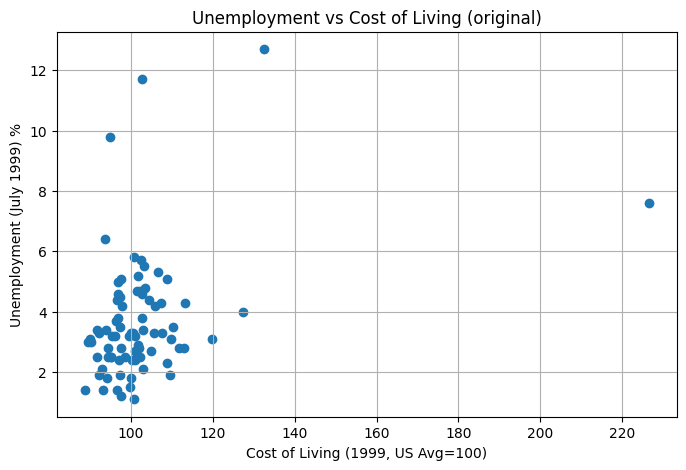

Detected most extreme outlier (by standardized distance):
New York
      NY
   226.5
     7.6


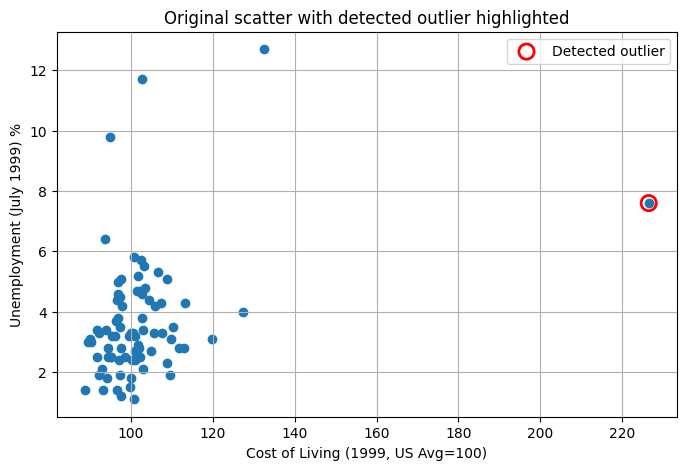


Trendline after removing single most extreme outlier:
  Unemployment = -5.1552 + (0.0869) * Cost_of_Living
  R-squared = 0.1159

Model summary:
                             OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     10.09
Date:                Sun, 23 Nov 2025   Prob (F-statistic):            0.00214
Time:                        06:17:02   Log-Likelihood:                -160.26
No. Observations:                  79   AIC:                             324.5
Df Residuals:                      77   BIC:                             329.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      

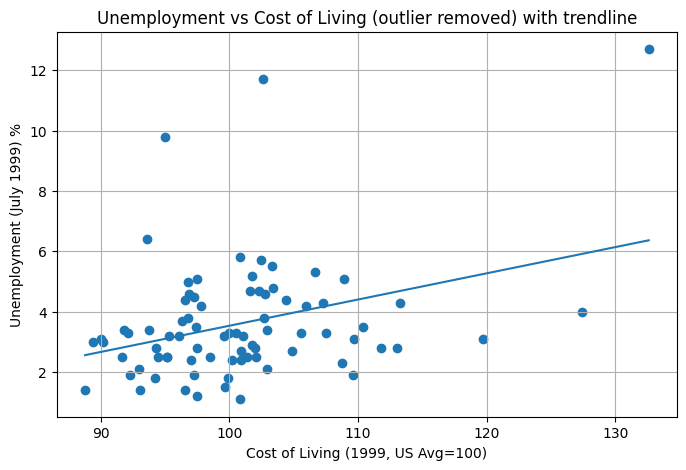


Conclusion: R-squared = 0.1159 → weak linear relationship (after removing the single most extreme outlier).


In [45]:
# col_unemp_analysis.py
# Analyze relationship between Cost of Living and Unemployment, detect one outlier,
# remove it, fit trendline and report equation + R^2. Produces two plots.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import statsmodels.api as sm

DATA = """
Metropolitan Area\tState\tCost\tUnemp
Baltimore	MD	102.30	4.70%
Detroit	MI	113.00	2.80%
Grand Rapids	MI	102.10	2.50%
Lansing	MI	102.90	2.10%
Minneapolis‐St. Paul	MN	99.70	1.50%
Rochester	MN	97.50	1.20%
Columbia	MO	93.10	1.40%
Kansas City	MO	96.10	3.20%
Springfield	MO	94.50	2.50%
St. Louis	MO	97.40	3.50%
Jackson	MS	94.30	2.80%
Billings	MT	102.70	3.80%
Great Falls	MT	102.50	5.70%
Missoula	MT	101.80	5.20%
Asheville	NC	100.00	3.30%
Charlotte	NC	96.80	5.00%
Greensboro‐Winston‐Salem	NC	97.50	2.80%
Raleigh	NC	97.30	1.90%
Wilmington	NC	97.80	4.20%
Bismarck	ND	99.90	1.80%
Fargo	ND	100.80	1.10%
Lincoln	NE	88.80	1.40%
Omaha	NE	92.30	1.90%
Concord	NH	108.80	2.30%
Atlantic City	NJ	132.60	12.70%
Albuquerque	NM	102.80	4.60%
Las Vegas	NV	105.60	3.30%
Reno	NV	111.80	2.80%
Albany	NY	109.70	3.10%
Buffalo	NY	97.30	4.50%
New York	NY	226.50	7.60%
Rochester	NY	110.40	3.50%
Syracuse	NY	102.90	3.40%
Akron	OH	96.30	3.70%
Cincinnati	OH	101.10	3.20%
Cleveland	OH	106.00	4.20%
Columbus	OH	101.40	2.50%
Toledo	OH	96.90	4.60%
Oklahoma City	OK	90.20	3.00%
Tulsa	OK	89.40	3.00%
Eugene	OR	108.90	5.10%
Portfland	OR	107.30	4.30%
Salem	OR	103.30	5.50%
Allentown	PA	104.40	4.40%
Erie	PA	101.60	4.70%
Harrisburg	PA	104.90	2.70%
Philadelphia	PA	127.40	4.00%
Pittsburgh	PA	113.30	4.30%
Williamsport	PA	97.50	5.10%
Charleston	SC	95.20	2.50%
Columbia	SC	94.20	1.80%
Greenville	SC	95.20	2.50%
Rapid City	SO	100.20	2.40%
Souix Falls	SO	96.60	1.40%
Knoxville	TN	93.80	3.40%
Memphis	TN	95.30	3.20%
Nashville	TN	91.70	2.50%
Abilene	TX	91.80	3.40%
Amarillo	TX	90.00	3.10%
Austin	TX	100.90	2.40%
Corpus Christi	TX	93.60	6.40%
Dallas‐Fort Worth	TX	101.80	2.90%
El Paso	TX	95.00	9.80%
Houston	TX	96.80	3.80%
San Antonio	TX	99.60	3.20%
Waco	TX	92.10	3.30%
Salt Lake City	UT	100.90	2.70%
Norfolk	VA	100.50	3.30%
Richmond	VA	102.00	2.80%
Roanoke	VA	93.00	2.10%
Burlington	VT	109.60	1.90%
Olympia	WA	103.40	4.80%
Seattle	WA	119.70	3.10%
Spokane	WA	106.70	5.30%
Yakima	WA	102.60	11.70%
Green Bay	Wl	97.00	2.40%
La Crosse	WI	98.50	2.50%
Milwaukee	Wl	107.50	3.30%
Charleston	WV	96.60	4.40%
Huntington	WV	100.80	5.80%
"""

# Read and clean
df = pd.read_csv(StringIO(DATA), sep="\t")
df['Unemp'] = df['Unemp'].str.rstrip('%').astype(float)
df.rename(columns={'Cost':'Cost_of_Living','Unemp':'Unemployment','Metropolitan Area':'Metro'}, inplace=True)

# 1) Scatter plot (original)
plt.figure(figsize=(8,5))
plt.scatter(df['Cost_of_Living'], df['Unemployment'])
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Unemployment vs Cost of Living (original)')
plt.grid(True)
plt.show()

# 2) Detect single most extreme outlier by standardized distance
X = df[['Cost_of_Living','Unemployment']].to_numpy()
means = X.mean(axis=0)
stds = X.std(axis=0, ddof=0)
Z = (X - means) / stds
dist = np.linalg.norm(Z, axis=1)
out_idx = int(np.argmax(dist))
outlier = df.iloc[out_idx]

print("Detected most extreme outlier (by standardized distance):")
print(outlier[['Metro','State','Cost_of_Living','Unemployment']].to_string(index=False))

# 3) Plot original with outlier highlighted
plt.figure(figsize=(8,5))
plt.scatter(df['Cost_of_Living'], df['Unemployment'])
plt.scatter([outlier['Cost_of_Living']], [outlier['Unemployment']], s=120, facecolors='none', edgecolors='red', linewidths=2, label='Detected outlier')
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Original scatter with detected outlier highlighted')
plt.legend(); plt.grid(True)
plt.show()

# 4) Remove outlier and fit linear regression (trendline)
df_clean = df.drop(df.index[out_idx]).reset_index(drop=True)
Xc = sm.add_constant(df_clean['Cost_of_Living'])
model = sm.OLS(df_clean['Unemployment'], Xc).fit()
a = model.params['const']
b = model.params['Cost_of_Living']
r2 = model.rsquared

print("\nTrendline after removing single most extreme outlier:")
print(f"  Unemployment = {a:.4f} + ({b:.4f}) * Cost_of_Living")
print(f"  R-squared = {r2:.4f}")
print("\nModel summary:\n", model.summary())

# 5) Plot cleaned scatter with trendline
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Cost_of_Living'], df_clean['Unemployment'])
x_vals = np.linspace(df_clean['Cost_of_Living'].min(), df_clean['Cost_of_Living'].max(), 200)
y_vals = a + b * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Unemployment vs Cost of Living (outlier removed) with trendline')
plt.grid(True)
plt.show()

# 6) Basic conclusion rule-of-thumb
if r2 >= 0.7:
    strength = "strong"
elif r2 >= 0.4:
    strength = "moderate"
elif r2 >= 0.1:
    strength = "weak"
else:
    strength = "very weak or negligible"
print(f"\nConclusion: R-squared = {r2:.4f} → {strength} linear relationship (after removing the single most extreme outlier).")


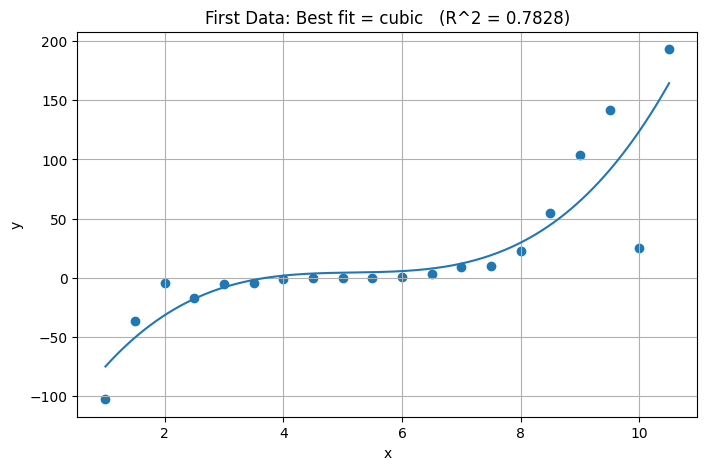

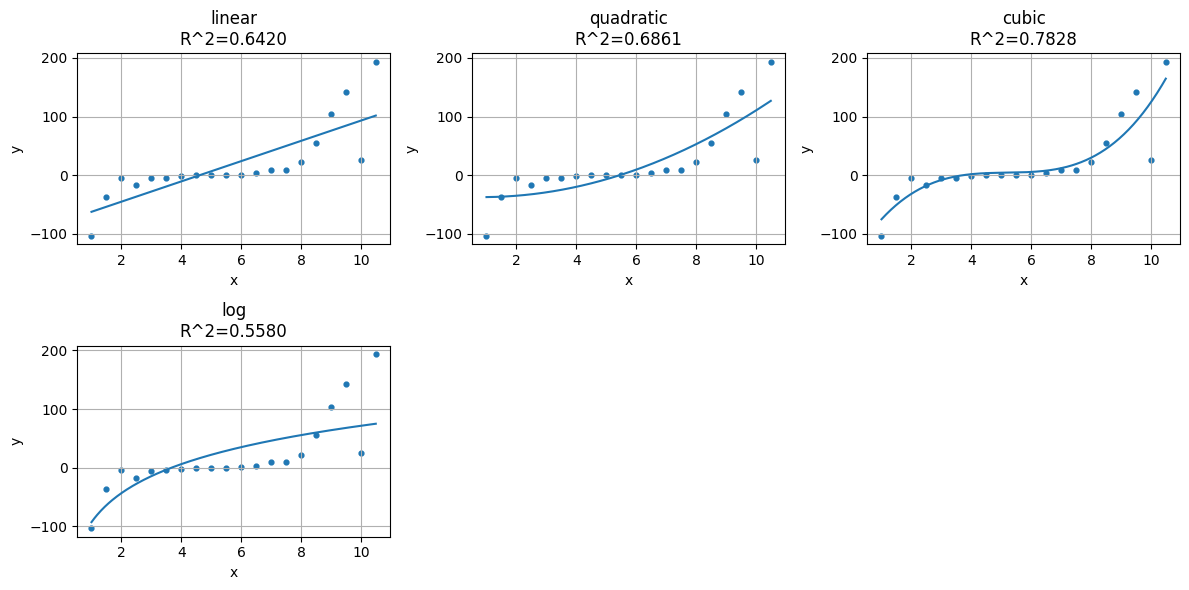

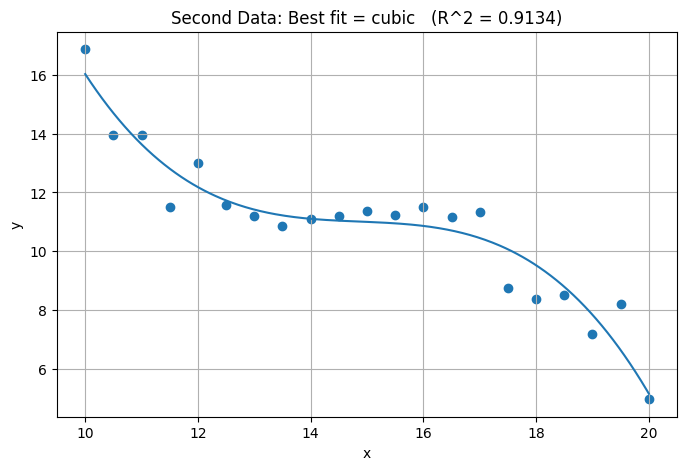

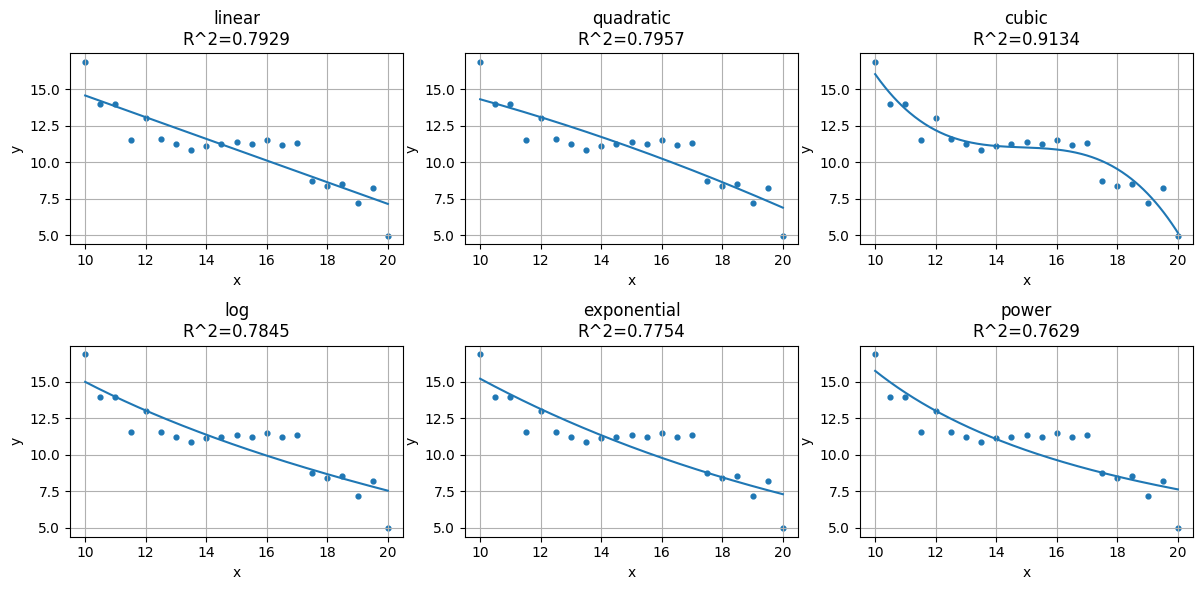

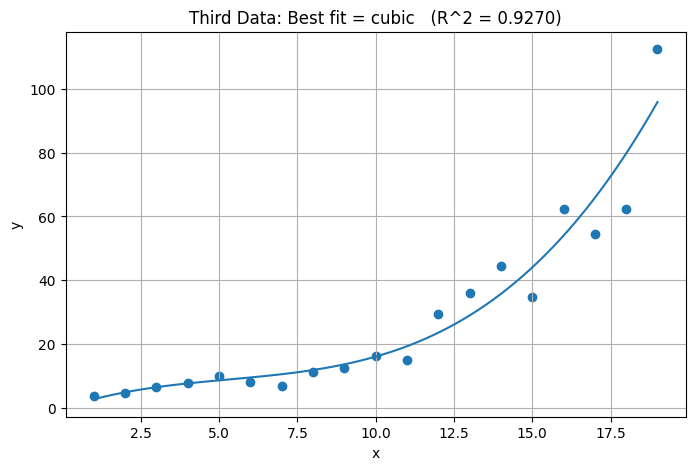

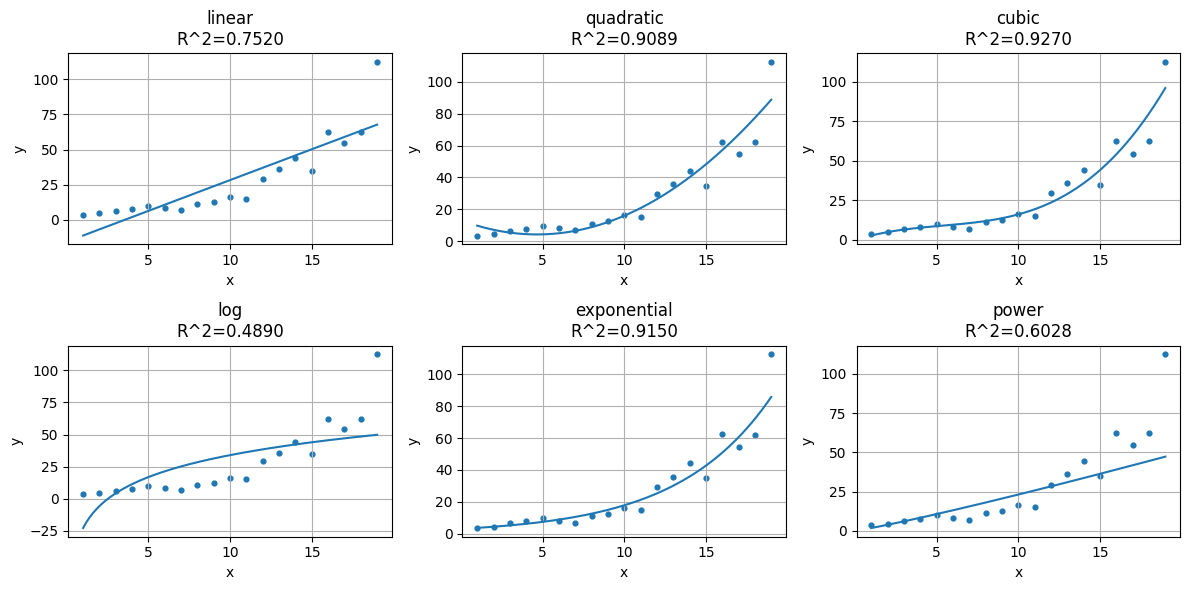



=== Q&A Summary ===

First dataset: best model type: cubic
Equation: y = 1.040 x^3 + -16.188 x^2 + 84.707 x + -144.659
R^2 = 0.7828

Second dataset: best model type: cubic
Equation: y = -0.040 x^3 + 1.795 x^2 + -26.756 x + 144.361
R^2 = 0.9134

Third dataset: best model type: cubic
Equation: y = 0.029 x^3 + -0.468 x^2 + 3.380 x + -0.310
R^2 = 0.9270

Models ranked by R^2 for First Data:
  cubic        R^2 = 0.7828   eq: y = 1.040 x^3 + -16.188 x^2 + 84.707 x + -144.659
  quadratic    R^2 = 0.6861   eq: y = 1.760 x^2 + -2.979 x + -36.072
  linear       R^2 = 0.6420   eq: y = 17.262 x + -79.635
  log          R^2 = 0.5580   eq: y = -92.759 + 71.313 ln(x)

Models ranked by R^2 for Second Data:
  cubic        R^2 = 0.9134   eq: y = -0.040 x^3 + 1.795 x^2 + -26.756 x + 144.361
  quadratic    R^2 = 0.7957   eq: y = -0.016 x^2 + -0.254 x + 18.471
  linear       R^2 = 0.7929   eq: y = -0.743 x + 21.989
  log          R^2 = 0.7845   eq: y = 39.749 + -10.756 ln(x)
  exponential  R^2 = 0.7754  

In [45]:
# Python analysis: Fit candidate functions to three datasets, choose best-fitting (by R^2), and produce Q&A outputs.
# Plots are created for each dataset showing scatter + best-fit curve and also all candidate fits in smaller subplots.
# Candidate models: linear, quadratic, cubic, logarithmic (y = a + b ln x), exponential (y = a * e^{b x}), power (y = a * x^b)
# Exponential and power require y > 0 (and power requires x>0), otherwise they are skipped.
# R^2 computed as 1 - SS_res / SS_tot.
# This cell will display results and plots for all three datasets.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import math

plt.rcParams.update({'figure.max_open_warning': 0})

# ---------------------- Input datasets ----------------------
first_data = """
x\ty
1\t-102.8
1.5\t-36.4
2\t-4.7
2.5\t-17.0
3\t-5.3
3.5\t-4.2
4\t-1.5
4.5\t-0.2
5\t0.0
5.5\t0.1
6\t0.8
6.5\t3.4
7\t9.1
7.5\t9.5
8\t22.5
8.5\t54.9
9\t103.8
9.5\t142.0
10\t25.2
10.5\t193.2
"""

second_data = """
x\ty
10\t16.87
10.5\t13.97
11\t13.97
11.5\t11.52
12\t12.99
12.5\t11.56
13\t11.21
13.5\t10.86
14\t11.11
14.5\t11.21
15\t11.36
15.5\t11.24
16\t11.51
16.5\t11.18
17\t11.32
17.5\t8.74
18\t8.37
18.5\t8.51
19\t7.18
19.5\t8.20
20\t4.97
"""

third_data = """
x\ty
1\t3.61
2\t4.57
3\t6.48
4\t7.81
5\t9.85
6\t8.12
7\t6.82
8\t11.05
9\t12.57
10\t16.34
11\t15.08
12\t29.41
13\t35.89
14\t44.35
15\t34.73
16\t62.33
17\t54.46
18\t62.18
19\t112.47
"""

def load_df(s):
    df = pd.read_csv(StringIO(s.strip()), sep="\t")
    return df

df1 = load_df(first_data); df2 = load_df(second_data); df3 = load_df(third_data)

# ---------------------- Utility functions ----------------------
def r2_score(y, yhat):
    y = np.array(y)
    yhat = np.array(yhat)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - ss_res/ss_tot if ss_tot != 0 else float('nan')

def fit_models(x, y):
    """
    Try candidate models. Return dict of model_name -> dict(params, predict_fn, r2, nice_eq)
    """
    results = {}
    x = np.array(x)
    y = np.array(y)
    # Prepare fine grid for plotting
    x_grid = np.linspace(x.min(), x.max(), 300)
    
    # 1) Linear
    p1 = np.polyfit(x, y, 1)
    yhat1 = np.polyval(p1, x)
    r2_1 = r2_score(y, yhat1)
    coeffs = p1
    def pred_linear(xv): return np.polyval(coeffs, xv)
    results['linear'] = {'r2': r2_1, 'coeffs': coeffs, 'predict': pred_linear,
                         'eq': f"y = {coeffs[0]:.3f} x + {coeffs[1]:.3f}", 'x_grid': x_grid, 'y_grid': pred_linear(x_grid)}
    
    # 2) Quadratic
    p2 = np.polyfit(x, y, 2)
    yhat2 = np.polyval(p2, x)
    r2_2 = r2_score(y, yhat2)
    coeffs = p2
    def pred_quad(xv): return np.polyval(coeffs, xv)
    results['quadratic'] = {'r2': r2_2, 'coeffs': coeffs, 'predict': pred_quad,
                            'eq': f"y = {coeffs[0]:.3f} x^2 + {coeffs[1]:.3f} x + {coeffs[2]:.3f}", 'x_grid': x_grid, 'y_grid': pred_quad(x_grid)}
    
    # 3) Cubic
    p3 = np.polyfit(x, y, 3)
    yhat3 = np.polyval(p3, x)
    r2_3 = r2_score(y, yhat3)
    coeffs = p3
    def pred_cubic(xv): return np.polyval(coeffs, xv)
    results['cubic'] = {'r2': r2_3, 'coeffs': coeffs, 'predict': pred_cubic,
                        'eq': f"y = {coeffs[0]:.3f} x^3 + {coeffs[1]:.3f} x^2 + {coeffs[2]:.3f} x + {coeffs[3]:.3f}", 'x_grid': x_grid, 'y_grid': pred_cubic(x_grid)}
    
    # 4) Logarithmic: y = a + b ln(x). requires x>0
    if np.all(x>0):
        ln_x = np.log(x)
        b, a = np.polyfit(ln_x, y, 1)  # fit y = b ln(x) + a
        def pred_log(xv): return a + b * np.log(xv)
        yhat_log = pred_log(x)
        r2_log = r2_score(y, yhat_log)
        results['log'] = {'r2': r2_log, 'coeffs': (a,b), 'predict': pred_log,
                          'eq': f"y = {a:.3f} + {b:.3f} ln(x)", 'x_grid': x_grid, 'y_grid': pred_log(x_grid)}
    
    # 5) Exponential: y = a * exp(b x) => ln(y) = ln(a) + b x; requires y>0
    if np.all(y>0):
        ln_y = np.log(y)
        b, ln_a = np.polyfit(x, ln_y, 1)
        a = np.exp(ln_a)
        def pred_exp(xv): return a * np.exp(b * xv)
        yhat_exp = pred_exp(x)
        r2_exp = r2_score(y, yhat_exp)
        results['exponential'] = {'r2': r2_exp, 'coeffs': (a,b), 'predict': pred_exp,
                                  'eq': f"y = {a:.3f} e^({b:.3f} x)", 'x_grid': x_grid, 'y_grid': pred_exp(x_grid)}
    # 6) Power: y = a * x^b => ln(y) = ln(a) + b ln(x); requires x>0 and y>0
    if np.all(x>0) and np.all(y>0):
        ln_x = np.log(x); ln_y = np.log(y)
        b, ln_a = np.polyfit(ln_x, ln_y, 1)
        a = np.exp(ln_a)
        def pred_power(xv): return a * (xv ** b)
        yhat_power = pred_power(x)
        r2_power = r2_score(y, yhat_power)
        results['power'] = {'r2': r2_power, 'coeffs': (a,b), 'predict': pred_power,
                            'eq': f"y = {a:.3f} x^{b:.3f}", 'x_grid': x_grid, 'y_grid': pred_power(x_grid)}
    
    return results

def analyze_and_plot(df, title):
    x = df['x'].values
    y = df['y'].values
    results = fit_models(x,y)
    # Determine best model by R^2 (choose highest)
    best_model = max(results.items(), key=lambda it: it[1]['r2'])
    best_name, best_info = best_model
    
    # Plot raw scatter and best fit only larger
    plt.figure(figsize=(8,5))
    plt.scatter(x,y)
    plt.plot(best_info['x_grid'], best_info['y_grid'])
    plt.xlabel('x'); plt.ylabel('y')
    plt.title(f"{title}: Best fit = {best_name}   (R^2 = {best_info['r2']:.4f})")
    plt.grid(True)
    plt.show()
    
    # Also show small panel of all candidates and R^2 values
    n = len(results)
    cols = 3
    rows = int(np.ceil(n/cols))
    plt.figure(figsize=(12, 3*rows))
    i=1
    for name,(info) in results.items():
        plt.subplot(rows, cols, i)
        plt.scatter(x,y, s=12)
        plt.plot(info['x_grid'], info['y_grid'])
        plt.title(f"{name}\nR^2={info['r2']:.4f}")
        plt.xlabel('x'); plt.ylabel('y')
        plt.grid(True)
        i+=1
    plt.tight_layout()
    plt.show()
    
    # Return structured result
    return best_name, best_info, results

# ---------------------- Run analysis for each dataset ----------------------
df1r = df1.rename(columns={'x':'x','y':'y'})
df2r = df2.rename(columns={'x':'x','y':'y'})
df3r = df3.rename(columns={'x':'x','y':'y'})

best1_name, best1_info, res1 = analyze_and_plot(df1r, "First Data")
best2_name, best2_info, res2 = analyze_and_plot(df2r, "Second Data")
best3_name, best3_info, res3 = analyze_and_plot(df3r, "Third Data")

# ---------------------- Print Q&A style summary answers ----------------------
print("\n\n=== Q&A Summary ===\n")

# First data
print("First dataset: best model type:", best1_name)
print("Equation:", best1_info['eq'])
print("R^2 =", f"{best1_info['r2']:.4f}")
print("")

# Second data
print("Second dataset: best model type:", best2_name)
print("Equation:", best2_info['eq'])
print("R^2 =", f"{best2_info['r2']:.4f}")
print("")

# Third data
print("Third dataset: best model type:", best3_name)
print("Equation:", best3_info['eq'])
print("R^2 =", f"{best3_info['r2']:.4f}")
print("")

# Also print ranked candidate models for each dataset
def print_ranked(res, label):
    print(f"Models ranked by R^2 for {label}:")
    for name,info in sorted(res.items(), key=lambda it: it[1]['r2'], reverse=True):
        print(f"  {name:12s} R^2 = {info['r2']:.4f}   eq: {info['eq']}")
    print("")

print_ranked(res1, "First Data")
print_ranked(res2, "Second Data")
print_ranked(res3, "Third Data")

# End of analysis
print("Notes: Polynomial fits are limited to degree <= 3. Exponential/power/log models were fitted where mathematically valid.")



In [46]:
# auto_survey_analysis.py
"""
Auto survey regression Q&A script

- Fits candidate models to predict Miles/Gallon:
    Mileage-only, Age-only, Mileage+Age
- Adds Purchased dummy (New=1, Used=0) to the model
- Tests whether Purchased should be added (p-value)
- Tests for interaction between Age and Purchased:
    H0: beta4 = 0  vs  H1: beta4 != 0
- Prints answers for Parts 1-7 with the requested rounding

Run:
    python auto_survey_analysis.py
Requires:
    pandas, numpy, statsmodels
    pip install pandas numpy statsmodels
"""

import pandas as pd
import statsmodels.api as sm
import numpy as np
from io import StringIO

# -------------------- Data --------------------
data_str = """
Purchased\tMileage\tAge\tMiles/Gallon
Used\t127233\t15\t28.7
New\t23970\t1\t43.4
New\t77392\t7\t24
Used\t185397\t14\t15.2
New\t26001\t2\t37
New\t180643\t9\t20
Used\t72083\t6\t45.7
New\t165353\t11\t42
Used\t205288\t13\t33
Used\t182584\t14\t12
Used\t140479\t13\t20
New\t22114\t2\t28
New\t3454\t0.25\t28.3
Used\t105628\t10\t35
New\t48678\t5\t30.4
New\t6849\t0.5\t40.2
Used\t137941\t10\t30
New\t29823\t4\t24.9
Used\t85763\t14\t21
Used\t134172\t12\t31
Used\t86387\t12\t27
"""

df = pd.read_csv(StringIO(data_str), sep="\t")

# Create Purchased dummy: New=1, Used=0
df['Purchased_dummy'] = (df['Purchased'].str.strip().str.lower() == 'new').astype(int)

# Helper rounding functions
def r2(x):
    try:
        return round(float(x), 2)
    except:
        return x
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

# Dependent variable
y = df['Miles/Gallon']

# -------------------- Part a: fit candidate models --------------------
# Mileage-only
X_m = sm.add_constant(df[['Mileage']])
model_m = sm.OLS(y, X_m).fit()

# Age-only
X_a = sm.add_constant(df[['Age']])
model_a = sm.OLS(y, X_a).fit()

# Mileage + Age
X_ma = sm.add_constant(df[['Mileage','Age']])
model_ma = sm.OLS(y, X_ma).fit()

# Compare adjusted R-squared
adjr_m = model_m.rsquared_adj
adjr_a = model_a.rsquared_adj
adjr_ma = model_ma.rsquared_adj

# Choose best among A/B/C by adjusted R^2
adjr_map = {
    'Mileage_only': adjr_m,
    'Age_only': adjr_a,
    'Mileage_Age': adjr_ma
}
best_basic_key = max(adjr_map, key=adjr_map.get)

# Prepare equations rounded to 2 decimals
eq_m = f"Miles/Gallon = {r2(model_m.params['const'])} + ({r2(model_m.params['Mileage'])})*Mileage"
eq_a = f"Miles/Gallon = {r2(model_a.params['const'])} + ({r2(model_a.params['Age'])})*Age"
eq_ma = f"Miles/Gallon = {r2(model_ma.params['const'])} + ({r2(model_ma.params['Mileage'])})*Mileage + ({r2(model_ma.params['Age'])})*Age"

# -------------------- Part b: add Purchased to model --------------------
# Fit Mileage + Age + Purchased
X_map = sm.add_constant(df[['Mileage','Age','Purchased_dummy']])
model_map = sm.OLS(y, X_map).fit()

# Equation rounded to 2 decimals
eq_map = f"Miles/Gallon = {r2(model_map.params['const'])} + ({r2(model_map.params['Mileage'])})*Mileage + ({r2(model_map.params['Age'])})*Age + ({r2(model_map.params['Purchased_dummy'])})*Purchased"

# Check whether adding Purchased improves adjusted R^2
adjr_map_val = model_map.rsquared_adj
improves = adjr_map_val > adjr_ma

# p-value for Purchased
p_purchased = model_map.pvalues['Purchased_dummy']

# -------------------- Part c: interaction test --------------------
# Add interaction term Age * Purchased
df['Age_Purch_interaction'] = df['Age'] * df['Purchased_dummy']
X_inter = sm.add_constant(df[['Mileage','Age','Purchased_dummy','Age_Purch_interaction']])
model_inter = sm.OLS(y, X_inter).fit()

# Extract interaction coefficient, t-stat, p-value
coef_inter = model_inter.params['Age_Purch_interaction']
t_inter = model_inter.tvalues['Age_Purch_interaction']
pval_inter = model_inter.pvalues['Age_Purch_interaction']

# -------------------- Print Q&A ------
alpha = 0.05

print("\nAuto survey regression Q&A (alpha = 0.05)\n" + "="*60 + "\n")

# Part a
print("Part a) Find the best regression model to predict miles/gallon as a function of vehicle age and mileage.\n")
print("Candidate A: Mileage only")
print("  Equation:", eq_m)
print("  Adjusted R^2:", r3(adjr_m))
print()
print("Candidate B: Age only")
print("  Equation:", eq_a)
print("  Adjusted R^2:", r3(adjr_a))
print()
print("Candidate C: Mileage + Age")
print("  Equation:", eq_ma)
print("  Adjusted R^2:", r3(adjr_ma))
print("\nBest model by adjusted R-squared: ", best_basic_key)
if best_basic_key == 'Mileage_only':
    print("Answer Part a: Choose option A (Mileage only).")
    print("Filled model (rounded to 2 decimals):", eq_m)
elif best_basic_key == 'Age_only':
    print("Answer Part a: Choose option B (Age only).")
    print("Filled model (rounded to 2 decimals):", eq_a)
else:
    print("Answer Part a: Choose option C (Mileage + Age).")
    print("Filled model (rounded to 2 decimals):", eq_ma)

# Part b
print("\n\nPart b) Add Purchased (New=1, Used=0) to the model. Does this change the result for the best model?")
print("Model with Purchased (Mileage + Age + Purchased):")
print("  Equation (2 decimals):", eq_map)
print("  Adjusted R^2 (with Purchased):", r3(adjr_map_val))
print("  Adjusted R^2 (without Purchased):", r3(adjr_ma))
if improves:
    print("Adding Purchased improved the adjusted R^2; the best model changes (Purchased helps).")
else:
    print("Adding Purchased did not improve adjusted R^2; the best model does not change (Purchased not helpful).")

# Part 3
print("\n\nPart 3) Should the Purchased variable be added to the model?")
print(f"  Purchased p-value = {r3(p_purchased)}")
if p_purchased < alpha:
    print(f"  Answer: Yes, because the p-value for Purchased ({r3(p_purchased)}) is less than the level of significance ({alpha}).")
else:
    print(f"  Answer: No, because the p-value for Purchased ({r3(p_purchased)}) is greater than the level of significance ({alpha}).")

# Part 4: Interaction hypotheses
print("\n\nPart 4) Test for interaction between vehicle age and Purchased (let beta4 denote coeff of interaction).")
print("  H0: beta4 = 0")
print("  H1: beta4 != 0")

# Part 5: test statistic
print("\nPart 5) Test statistic for interaction term:")
print(f"  t = {r2(t_inter)}")

# Part 6: p-value for interaction
print("\nPart 6) p-value for interaction term:")
print(f"  p-value = {r3(pval_inter)}")

# Part 7: Conclusion
print("\nPart 7) Conclusion at alpha = 0.05:")
if pval_inter < alpha:
    print("  Reject the null hypothesis. There is sufficient evidence of an interaction between vehicle age and whether the vehicle was purchased new or used.")
else:
    print("  Fail to reject the null hypothesis. There is insufficient evidence of an interaction between vehicle age and whether the vehicle was purchased new or used.")

# For reference, print model summaries (coefficients & p-values) for the key models
print("\n\nReference: Key model summaries (coefficients and p-values)\n")
print("Mileage + Age model coefficients (2 decimals):")
print(model_ma.params.round(2))
print("p-values:")
print(model_ma.pvalues.round(3))

print("\nMileage + Age + Purchased model coefficients (2 decimals):")
print(model_map.params.round(2))
print("p-values:")
print(model_map.pvalues.round(3))

print("\nModel with interaction coefficients (4 decimals):")
print(model_inter.params.round(4))
print("p-values:")
print(model_inter.pvalues.round(4))



Auto survey regression Q&A (alpha = 0.05)

Part a) Find the best regression model to predict miles/gallon as a function of vehicle age and mileage.

Candidate A: Mileage only
  Equation: Miles/Gallon = 34.89 + (-0.0)*Mileage
  Adjusted R^2: 0.121

Candidate B: Age only
  Equation: Miles/Gallon = 36.64 + (-0.87)*Age
  Adjusted R^2: 0.201

Candidate C: Mileage + Age
  Equation: Miles/Gallon = 36.59 + (0.0)*Mileage + (-0.95)*Age
  Adjusted R^2: 0.157

Best model by adjusted R-squared:  Age_only
Answer Part a: Choose option B (Age only).
Filled model (rounded to 2 decimals): Miles/Gallon = 36.64 + (-0.87)*Age


Part b) Add Purchased (New=1, Used=0) to the model. Does this change the result for the best model?
Model with Purchased (Mileage + Age + Purchased):
  Equation (2 decimals): Miles/Gallon = 44.26 + (0.0)*Mileage + (-1.69)*Age + (-6.84)*Purchased
  Adjusted R^2 (with Purchased): 0.167
  Adjusted R^2 (without Purchased): 0.157
Adding Purchased improved the adjusted R^2; the best mode

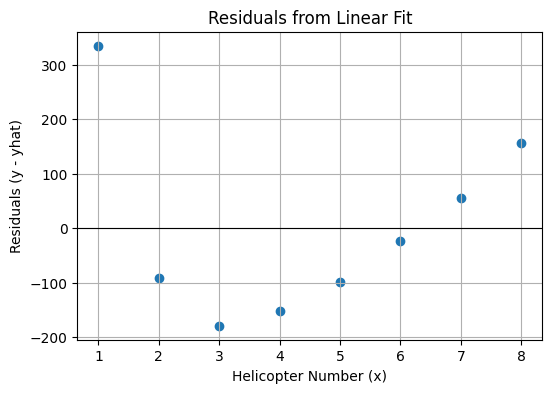

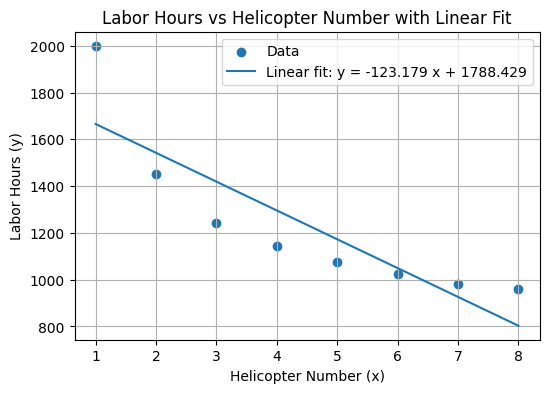


Linear model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     17.93
Date:                Sat, 22 Nov 2025   Prob (F-statistic):            0.00547
Time:                        15:43:58   Log-Likelihood:                -52.114
No. Observations:                   8   AIC:                             108.2
Df Residuals:                       6   BIC:                             108.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1788.4286    146.

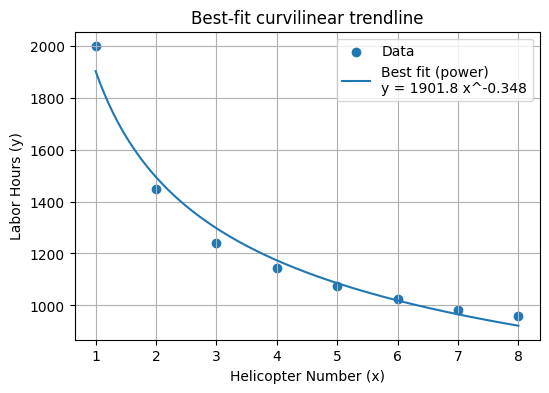


--- Multiple-choice friendly summary (rounded as requested) ---

Residuals plot interpretation (visual inspection required):
  * Look at the residuals plot displayed above. If residuals show a clear curved pattern -> 'a nonlinear shape' and linear model is not suitable.

Linear model R^2 = 0.749315

Best curvilinear model details:
A. The best trendline is Power with an R-squared value of 0.979.
   Equation: y = (1901.8) x^-0.348

(If you want the program to automatically choose A/B/C/D, run this script and read the printed 'Best curvilinear model' above.)


In [47]:
# helicopter_learning_analysis.py
# Analyze helicopter learning curve data:
#  - fit simple linear regression and show residual plot
#  - fit curvilinear models: power, quadratic polynomial (degree 2), logarithmic, exponential
#  - choose the best curvilinear model by R^2 (not using polynomials beyond degree 2)
#  - output results formatted for the multiple-choice answers and rounding rules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import statsmodels.api as sm
import math

# ---------- Data ----------
data_str = """Helicopter,LaborHours
1,2000
2,1450
3,1240
4,1144
5,1074
6,1025
7,981
8,959
"""
df = pd.read_csv(StringIO(data_str))
x = df['Helicopter'].to_numpy(dtype=float)
y = df['LaborHours'].to_numpy(dtype=float)

# ---------- Linear fit ----------
X_lin = sm.add_constant(x)               # adds intercept column
model_lin = sm.OLS(y, X_lin).fit()
yhat_lin = model_lin.predict(X_lin)
resid_lin = y - yhat_lin

# Residual plot (visual inspection)
plt.figure(figsize=(6,4))
plt.axhline(0, color='k', linewidth=0.8)
plt.scatter(x, resid_lin)
plt.xlabel('Helicopter Number (x)')
plt.ylabel('Residuals (y - yhat)')
plt.title('Residuals from Linear Fit')
plt.grid(True)
plt.show()

# Scatter with linear fit
plt.figure(figsize=(6,4))
plt.scatter(x, y, label='Data')
plt.plot(x, yhat_lin, label=f'Linear fit: y = {model_lin.params[1]:.3f} x + {model_lin.params[0]:.3f}')
plt.xlabel('Helicopter Number (x)')
plt.ylabel('Labor Hours (y)')
plt.title('Labor Hours vs Helicopter Number with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

# R^2 for linear
ss_res_lin = np.sum((y - yhat_lin)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2_lin = 1 - ss_res_lin / ss_tot

print("\nLinear model summary:")
print(model_lin.summary())
print(f"Linear model R-squared = {r2_lin:.6f}\n")

# ---------- Candidate curvilinear models ----------
results = {}

# 1) Power model: y = a * x^b  (requires x>0 and y>0)
if np.all(x > 0) and np.all(y > 0):
    ln_x = np.log(x)
    ln_y = np.log(y)
    # fit ln(y) = b * ln(x) + ln(a)
    b_power, ln_a_power = np.polyfit(ln_x, ln_y, 1)
    a_power = math.exp(ln_a_power)
    yhat_power = a_power * (x ** b_power)
    r2_power = 1 - np.sum((y - yhat_power)**2) / ss_tot
    results['power'] = {'a': a_power, 'b': b_power, 'yhat': yhat_power, 'r2': r2_power}

# 2) Polynomial degree 2: y = A x^2 + B x + C
coeffs_quad = np.polyfit(x, y, 2)
yhat_quad = np.polyval(coeffs_quad, x)
r2_quad = 1 - np.sum((y - yhat_quad)**2) / ss_tot
results['polynomial'] = {'A': coeffs_quad[0], 'B': coeffs_quad[1], 'C': coeffs_quad[2], 'yhat': yhat_quad, 'r2': r2_quad}

# 3) Logarithmic: y = a + b ln(x)  (requires x>0)
if np.all(x > 0):
    ln_x = np.log(x)
    b_log, a_log = np.polyfit(ln_x, y, 1)   # y = b_log * ln(x) + a_log
    yhat_log = a_log + b_log * ln_x
    r2_log = 1 - np.sum((y - yhat_log)**2) / ss_tot
    results['logarithmic'] = {'a': a_log, 'b': b_log, 'yhat': yhat_log, 'r2': r2_log}

# 4) Exponential: y = a * e^(b x)  (requires y>0)
if np.all(y > 0):
    ln_y = np.log(y)
    b_exp, ln_a_exp = np.polyfit(x, ln_y, 1)  # ln(y) = ln(a) + b x
    a_exp = math.exp(ln_a_exp)
    yhat_exp = a_exp * np.exp(b_exp * x)
    r2_exp = 1 - np.sum((y - yhat_exp)**2) / ss_tot
    results['exponential'] = {'a': a_exp, 'b': b_exp, 'yhat': yhat_exp, 'r2': r2_exp}

# Print candidate R^2 values
print("Candidate R-squared values (higher is better):")
for name, info in results.items():
    print(f"  {name.capitalize():12s}: R^2 = {info['r2']:.6f}")

# Select best curvilinear model by maximum R^2
best_name = max(results.keys(), key=lambda k: results[k]['r2'])
best = results[best_name]
print(f"\nBest curvilinear model: {best_name}  with R^2 = {best['r2']:.6f}")

# Plot data and best fit curve
plt.figure(figsize=(6,4))
plt.scatter(x, y, label='Data')
x_grid = np.linspace(x.min(), x.max(), 200)
if best_name == 'power':
    y_grid = best['a'] * (x_grid ** best['b'])
    eq_str = f"y = {best['a']:.1f} x^{best['b']:.3f}"   # coefficient to 1 decimal, exponent to 3 decimals per instructions
elif best_name == 'polynomial':
    A,B,C = best['A'], best['B'], best['C']
    y_grid = A * x_grid**2 + B * x_grid + C
    eq_str = f"y = {A:.3f} x^2 + {B:.3f} x + {C:.3f}"
elif best_name == 'logarithmic':
    y_grid = best['a'] + best['b'] * np.log(x_grid)
    eq_str = f"y = {best['a']:.3f} + {best['b']:.1f} ln(x)"   # b to 1 decimal, other values to 3 decimals
elif best_name == 'exponential':
    y_grid = best['a'] * np.exp(best['b'] * x_grid)
    eq_str = f"y = {best['a']:.1f} e^({best['b']:.3f} x)"    # a to 1 decimal, b to 3 decimals

plt.plot(x_grid, y_grid, label=f"Best fit ({best_name})\n{eq_str}")
plt.xlabel('Helicopter Number (x)')
plt.ylabel('Labor Hours (y)')
plt.title('Best-fit curvilinear trendline')
plt.legend()
plt.grid(True)
plt.show()

# Summarize answers per the multiple-choice formatting requested:
print("\n--- Multiple-choice friendly summary (rounded as requested) ---\n")
print("Residuals plot interpretation (visual inspection required):")
print("  * Look at the residuals plot displayed above. If residuals show a clear curved pattern -> 'a nonlinear shape' and linear model is not suitable.\n")
print("Linear model R^2 = {:.6f}".format(r2_lin))

print("\nBest curvilinear model details:")
if best_name == 'power':
    # A: power: y = (a) x^b: Round a to 1 decimal, b to 3 decimals, R^2 to 3 decimals in answer box:
    print("A. The best trendline is Power with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.1f}) x^{:.3f}".format(best['a'], best['b']))
elif best_name == 'polynomial':
    # B: polynomial: round coefficients to 3 decimals
    A,B,C = best['A'], best['B'], best['C']
    print("B. The best trendline is Polynomial with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.3f}) x^2 + ({:.3f}) x + ({:.3f})".format(A,B,C))
elif best_name == 'logarithmic':
    # C: logarithmic: round coefficient of ln(x) to 1 decimal (b), other values to 3 decimals
    a,b = best['a'], best['b']
    print("C. The best trendline is Logarithmic with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.3f}) + ({:.1f}) ln(x)".format(a,b))
elif best_name == 'exponential':
    # D: exponential: coefficient a to 1 decimal, exponent b to 3 decimals
    a,b = best['a'], best['b']
    print("D. The best trendline is Exponential with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.1f}) e^{:.3f} x".format(a,b))

print("\n(If you want the program to automatically choose A/B/C/D, run this script and read the printed 'Best curvilinear model' above.)")


In [48]:
# retention_model_selection.py
"""
Select best regression models for 1st-year retention rate.
Computes correlation matrix (3-dec), diagnoses multicollinearity,
and selects best models using (A) p-value criterion and (B) t-statistic criterion
over all subsets of predictors.

How the selections are made:
- p-value criterion: pick model where every predictor p-value < 0.05 and with maximum adjusted R^2.
  If no model meets that strict requirement, pick the model with the largest number of predictors
  with p<0.05; break ties by adjusted R^2.
- t-statistic criterion: pick the model with the largest sum of absolute t-statistics
  for its predictors (tie-break by adjusted R^2).

Outputs:
 - Correlation matrix (rounded 3 decimals)
 - List of strong predictor-pairs (abs corr > 0.8)
 - Best model by p-value criterion (predictors, equation, adj R^2, p-values)
 - Best model by t-statistic criterion (predictors, equation, adj R^2, t-values)
 - A small ranked list of top models by adj R^2 for reference
"""

import pandas as pd
import numpy as np
from io import StringIO
import statsmodels.api as sm
from itertools import combinations

# Input data (paste the dataset exactly as given)
data = """
Avg_ACT\tHS_GPA\tAvg_SAT\tPct_Top10\tPct_Top20\tRetention
21.9\t3.077\t1041.01\t9.93\t20.12\t67.49
21.91\t3.172\t1036.24\t12.53\t30.08\t67.22
21.78\t3.179\t1037.84\t14.06\t26.95\t69.34
22\t3.189\t1061.6\t14.58\t30.28\t71.19
23.79\t3.282\t1133.47\t17.99\t38.28\t76.35
24.02\t3.4\t1135.29\t18.3\t41.4\t79.5
24.1\t3.475\t1148.95\t33.13\t53.93\t88.5
25.56\t3.492\t1162.33\t32.21\t52.49\t87.13
20.68\t2.996\t992.85\t1.98\t18.44\t70.5
21.27\t3.186\t973.54\t11.88\t22.66\t67.82
21.5\t3.199\t1015.6\t13.52\t31.54\t76.33
20.82\t3.006\t986.6\t8.54\t19.15\t68.34
26.62\t3.515\t1200.03\t33.25\t61.25\t75.12
26.47\t3.605\t1195.65\t42.51\t63.22\t85.31
26.3\t3.566\t1200.63\t34.62\t60.33\t83.6
26.25\t3.533\t1205.77\t30.46\t56.33\t85.74
22.7\t3.199\t1064.43\t9.33\t18.6\t64.9
22.93\t3.347\t1075.17\t16.23\t33.27\t79.2
22.69\t3.201\t1065.47\t9.01\t23.21\t76.35
22.94\t3.237\t1077.88\t11.92\t25.02\t76.48
26.08\t3.572\t1211.07\t35.91\t67.83\t92.3
26.3\t3.6\t1193.17\t39.77\t64.51\t90.78
26.02\t3.617\t1194.6\t36.02\t66.66\t88.45
26.26\t3.637\t1200.76\t33.44\t63.22\t85.23
19.01\t2.621\t901.39\t2.53\t5.92\t59.17
19.04\t2.544\t923.84\t2.31\t8.61\t64.78
18.99\t2.601\t923.55\t1.24\t5.42\t64.99
19.24\t2.673\t920\t3.17\t9.34\t63.17
21.6\t3.276\t1024.91\t21.41\t36.7\t71.83
21.91\t3.328\t1010.66\t14.39\t22.41\t76.84
22.69\t3.404\t1003.89\t20.78\t36.11\t80.05
22.11\t3.346\t1019.05\t17.7\t41.44\t74.36
20.98\t2.854\t1014.52\t5.9\t16.46\t66.54
21.08\t2.905\t1013.48\t5.06\t16.74\t67.05
21.08\t2.84\t1013.65\t5.89\t14.08\t73.39
19\t2.528\t936.22\t1.54\t5.86\t67.12
19.48\t2.717\t932.49\t2.68\t15.49\t60.15
19.63\t2.703\t897.1\t6.22\t13.43\t63.4
19\t2.737\t924.48\t4.71\t13.36\t67.14
19.41\t2.69\t960.75\t4.03\t13.4\t62.43
21.19\t3.086\t957\t14.39\t35.44\t72.44
20.95\t3.189\t969.69\t23.58\t42.8\t51.78
21.98\t3.21\t996.42\t9.5\t20.81\t74.95
21.61\t3.339\t981\t6.87\t30.58\t71.8
"""

# Load into DataFrame
df = pd.read_csv(StringIO(data), sep="\t")
df.columns = ['Avg_ACT','HS_GPA','Avg_SAT','Pct_Top10','Pct_Top20','Retention']

# 1) Correlation matrix
corr = df.corr().round(3)

# Print correlation matrix
print("\nCorrelation matrix (rows/cols: Avg_ACT, HS_GPA, Avg_SAT, Pct_Top10, Pct_Top20, Retention):\n")
print(corr.to_string())
print("\n")

# 2) Multicollinearity check: list strong absolute correlations (> 0.8) among predictors
indep_vars = ['Avg_ACT','HS_GPA','Avg_SAT','Pct_Top10','Pct_Top20']
corr_indep = df[indep_vars].corr().abs()
strong_pairs = []
for i in range(len(indep_vars)):
    for j in range(i+1, len(indep_vars)):
        a = indep_vars[i]; b = indep_vars[j]
        val = corr_indep.loc[a,b]
        if val > 0.8:
            strong_pairs.append((a,b,val))
print("Strong absolute correlations among independent variables (abs(corr) > 0.8):")
if strong_pairs:
    for a,b,val in strong_pairs:
        print(f"  {a} & {b}: {val:.3f}")
else:
    print("  None (no abs corr > 0.8)")
print("\nSuggestion about multicollinearity: if you see pairs with abs corr > 0.8, that indicates potential multicollinearity.\n")

# 3) Model selection across all subsets
y = df['Retention']
predictors = indep_vars.copy()
results = []
for k in range(1, len(predictors)+1):
    for combo in combinations(predictors, k):
        X = sm.add_constant(df[list(combo)])
        model = sm.OLS(y, X).fit()
        pvals = {p: model.pvalues[p] for p in combo}
        tvals = {p: model.tvalues[p] for p in combo}
        results.append({
            'predictors': combo,
            'model': model,
            'adjr2': model.rsquared_adj,
            'r2': model.rsquared,
            'pvalues': pvals,
            'tvalues': tvals,
            'sum_abs_t': sum(abs(v) for v in tvals.values()),
            'sig_count': sum(1 for v in pvals.values() if v < 0.05)
        })

# p-value criterion
valid_all_signif = [r for r in results if r['sig_count'] == len(r['predictors']) and len(r['predictors'])>0]
if valid_all_signif:
    best_p = max(valid_all_signif, key=lambda r: r['adjr2'])
else:
    # None have all predictors significant: pick model with max sig_count, tiebreak adjr2
    max_sig = max(r['sig_count'] for r in results)
    candidates = [r for r in results if r['sig_count']==max_sig]
    best_p = max(candidates, key=lambda r: r['adjr2'])

# t-statistic criterion: maximize sum of absolute t-values (tie-breaker adjr2)
best_t = max(results, key=lambda r: (r['sum_abs_t'], r['adjr2']))

# Functions to format equation
def format_eq(res):
    params = res['model'].params
    terms = [f"{params['const']:.3f}"]
    for p in res['predictors']:
        terms.append(f"{params[p]:+.3f}*{p}")
    return "Retention = " + " ".join(terms)

# Print chosen models
print("Best model by p-value criterion:")
print("  Predictors:", best_p['predictors'])
print("  Adj R^2:", round(best_p['adjr2'], 3))
print("  Equation:", format_eq(best_p))
print("  Predictor p-values (rounded 3 dec):")
for p,v in best_p['pvalues'].items():
    print(f"    {p}: {v:.3f}")
print("\n")

print("Best model by t-statistic criterion (max sum abs t):")
print("  Predictors:", best_t['predictors'])
print("  Adj R^2:", round(best_t['adjr2'], 3))
print("  Equation:", format_eq(best_t))
print("  Predictor t-values (rounded 3 dec):")
for p,v in best_t['tvalues'].items():
    print(f"    {p}: {v:.3f}")
print("\n")

# Compare models
print("Comparison of the two approaches:")
print("  p-value model predictors:", best_p['predictors'], "adjR2=", round(best_p['adjr2'],3))
print("  t-stat model predictors:", best_t['predictors'], "adjR2=", round(best_t['adjr2'],3))
print("\nTop 6 models by adjusted R^2 (for reference):")
top = sorted(results, key=lambda r: r['adjr2'], reverse=True)[:6]
for r in top:
    print(f"  Predictors: {r['predictors']}, adjR2={r['adjr2']:.4f}, sig_count={r['sig_count']}")



Correlation matrix (rows/cols: Avg_ACT, HS_GPA, Avg_SAT, Pct_Top10, Pct_Top20, Retention):

           Avg_ACT  HS_GPA  Avg_SAT  Pct_Top10  Pct_Top20  Retention
Avg_ACT      1.000   0.923    0.976      0.920      0.930      0.853
HS_GPA       0.923   1.000    0.870      0.879      0.908      0.806
Avg_SAT      0.976   0.870    1.000      0.880      0.892      0.843
Pct_Top10    0.920   0.879    0.880      1.000      0.973      0.791
Pct_Top20    0.930   0.908    0.892      0.973      1.000      0.796
Retention    0.853   0.806    0.843      0.791      0.796      1.000


Strong absolute correlations among independent variables (abs(corr) > 0.8):
  Avg_ACT & HS_GPA: 0.923
  Avg_ACT & Avg_SAT: 0.976
  Avg_ACT & Pct_Top10: 0.920
  Avg_ACT & Pct_Top20: 0.930
  HS_GPA & Avg_SAT: 0.870
  HS_GPA & Pct_Top10: 0.879
  HS_GPA & Pct_Top20: 0.908
  Avg_SAT & Pct_Top10: 0.880
  Avg_SAT & Pct_Top20: 0.892
  Pct_Top10 & Pct_Top20: 0.973

Suggestion about multicollinearity: if you see pairs with abs c

In [49]:
import pandas as pd
import io
import statsmodels.api as sm

# -----------------------------
# RAW DATA STRING (as provided)
# -----------------------------
data = """
Couple's Income,Bride's Age,Wedding Cost,Attendance,Value Rating,Payor
98000,27,47000,150,3,Bride and Groom
72000,29,42000,200,5,Bride and Groom
90000,28,30500,150,3,Bride and Groom
43000,19,30000,250,3,Bride and Groom
100000,30,30000,300,3,Bride and Groom
78000,35,26000,200,5,Bride and Groom
75000,27,24000,200,5,Bride and Groom
45000,32,5000,50,5,Bride and Groom
130000,22,60700,300,3,Bride's Parents
157000,23,52000,350,1,Bride's Parents
86000,25,34000,250,3,Bride's Parents
65000,24,28000,250,3,Bride's Parents
73000,25,25000,150,5,Bride's Parents
64000,25,24000,200,1,Bride's Parents
75000,25,20000,200,5,Bride's Parents
67000,30,20000,200,5,Bride's Parents
75000,19,19000,150,3,Bride's Parents
52000,23,19000,200,1,Bride's Parents
64000,22,18000,150,1,Bride's Parents
55000,28,16000,100,5,Bride's Parents
62000,24,13000,150,1,Bride's Parents
40000,26,7000,50,3,Bride's Parents
67000,27,22000,200,5,Groom's Parents
62000,21,20000,100,1,Groom's Parents
"""

# -----------------------------
# LOAD DATA
# -----------------------------
df = pd.read_csv(io.StringIO(data))

# Filter only "Bride and Groom" payors
df_bg = df[df["Payor"] == "Bride and Groom"]

# -----------------------------
# REGRESSION
# -----------------------------
X = sm.add_constant(df_bg["Couple's Income"])
y = df_bg["Wedding Cost"]

model = sm.OLS(y, X).fit()

# Extract outputs
r2 = model.rsquared
slope = model.params["Couple's Income"]
intercept = model.params["const"]
t_stat = model.tvalues["Couple's Income"]
p_value = model.pvalues["Couple's Income"]
conf_int = model.conf_int()

intercept_CI_low, intercept_CI_high = conf_int.loc["const"]
slope_CI_low, slope_CI_high = conf_int.loc["Couple's Income"]

# Convert R² to percent
r2_percent = round(r2 * 100)

# -----------------------------
# PRINT ANSWERS WITH QUESTIONS
# -----------------------------
print("\n===========================")
print("PART 1 — Interpret R²")
print("===========================\n")
print(f"Answer: B. About {r2_percent}% of the variability in the wedding cost "
      f"can be explained by the variability in the couple's income.\n")

print("===========================")
print("PART 2 — Hypotheses")
print("===========================\n")
print("H0: β1 = 0   (No linear relationship)")
print("H1: β1 ≠ 0   (There IS a linear relationship)\n")

print("===========================")
print("PART 3 — Test Statistic")
print("===========================\n")
print(f"t = {t_stat:.2f}\n")

print("===========================")
print("PART 4 — p-value")
print("===========================\n")
print(f"p-value = {p_value:.3f}\n")

print("===========================")
print("PART 5 — Conclusion")
print("===========================\n")
if p_value < 0.05:
    print("Reject the null hypothesis. There is sufficient evidence of a linear relationship.\n")
else:
    print("Do not reject the null hypothesis. There is not sufficient evidence of a linear relationship.\n")

print("===========================")
print("PART 6 — 95% Confidence Intervals")
print("===========================\n")
print(f"{intercept_CI_low:.0f} ≤ β0 ≤ {intercept_CI_high:.0f}")
print(f"{slope_CI_low:.5f} ≤ β1 ≤ {slope_CI_high:.5f}\n")

print("===========================")
print("PART 7 — Interpretation")
print("===========================\n")
ci_width_intercept = intercept_CI_high - intercept_CI_low
ci_width_slope = slope_CI_high - slope_CI_low

if ci_width_slope < 0.001:
    ci_word = "small"
else:
    ci_word = "wide"

print(f"The confidence intervals are {ci_word}, suggesting that the coefficients "
      f"will not differ significantly from the estimates.\n")



PART 1 — Interpret R²

Answer: B. About 33% of the variability in the wedding cost can be explained by the variability in the couple's income.

PART 2 — Hypotheses

H0: β1 = 0   (No linear relationship)
H1: β1 ≠ 0   (There IS a linear relationship)

PART 3 — Test Statistic

t = 1.72

PART 4 — p-value

p-value = 0.136

PART 5 — Conclusion

Do not reject the null hypothesis. There is not sufficient evidence of a linear relationship.

PART 6 — 95% Confidence Intervals

-32337 ≤ β0 ≤ 41139
-0.14038 ≤ β1 ≤ 0.80357

PART 7 — Interpretation

The confidence intervals are wide, suggesting that the coefficients will not differ significantly from the estimates.



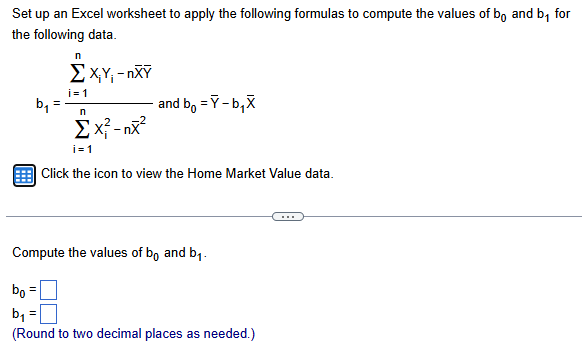

In [50]:
import pandas as pd
import io
import numpy as np

# ----------------------------------------
# RAW DATA STRING (as provided)
# ----------------------------------------
data = """
Square Feet,Market Value
1484,81300
1520,100700
1520,87200
1684,96700
1581,120700
1812,90000
1914,104400
1842,93300
1812,91000
1836,101900
2028,108500
1732,87600
1850,96000
1791,89200
1666,88400
1852,100800
1620,96700
1692,87500
2372,114000
2372,113200
1666,87500
2123,116100
1620,94700
1731,86400
1666,87100
1520,83400
1484,79800
1588,81500
1598,87100
1484,82600
1484,78800
1520,87600
1701,94200
1484,82000
1468,88100
1520,88100
1520,88600
1484,76600
1520,84400
1668,90900
1588,81000
"""

# Load data
df = pd.read_csv(io.StringIO(data))

X = df["Square Feet"].astype(float)
Y = df["Market Value"].astype(float)

n = len(df)

# Means
X_bar = X.mean()
Y_bar = Y.mean()

# Compute b1
numerator = np.sum(X * Y) - n * X_bar * Y_bar
denominator = np.sum(X**2) - n * X_bar**2
b1 = numerator / denominator

# Compute b0
b0 = Y_bar - b1 * X_bar

print(f"b0 = {b0:.2f}")
print(f"b1 = {b1:.2f}")


b0 = 32466.51
b1 = 35.21


In [51]:
import pandas as pd
import io
import statsmodels.api as sm
import numpy as np

# ----------------------------------------------------
# RAW DATA AS STRING (exactly as provided)
# ----------------------------------------------------
data = """
Ideas	Communication	Recognition	Training	Work_Conditions	Tools_Info	Work_Life	Satisfaction
5	4	4	3	5	3	5	9
2	3	2	2	4	5	2	3
2	3	2	4	4	4	2	5
2	3	1	4	4	4	2	4
5	4	3	5	5	5	3	8
5	5	5	5	5	5	5	9
3	3	3	4	4	4	3	8
3	4	4	4	5	5	2	7
5	5	5	5	5	5	5	10
2	2	1	3	3	4	2	4
5	4	4	3	4	5	5	9
3	4	3	4	5	5	4	7
4	4	4	4	5	5	5	8
3	2	2	3	2	4	3	5
4	3	4	3	3	4	4	6
4	5	4	4	4	4	4	8
5	4	3	4	3	5	3	7
3	4	3	3	4	5	5	8
4	5	3	2	3	5	4	7
3	2	2	2	2	4	2	4
2	2	2	2	3	5	3	3
4	4	3	4	4	5	3	9
5	5	3	5	3	5	3	8
2	3	2	4	2	5	3	5
4	3	4	3	3	5	2	6
5	5	5	5	5	5	5	10
5	3	4	5	5	5	5	9
2	4	2	2	2	5	3	3
4	3	2	2	5	5	5	6
4	4	4	5	5	5	5	8
"""

# ----------------------------------------------------
# LOAD DATA
# ----------------------------------------------------
df = pd.read_csv(io.StringIO(data), sep="\t")

X = df.drop(columns=["Satisfaction"])
y = df["Satisfaction"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
summary = model.summary()

# Extract values
r2 = model.rsquared
f_stat = model.fvalue
f_pvalue = model.f_pvalue

coeffs = model.params
t_stats = model.tvalues
p_values = model.pvalues

# ----------------------------------------------------
# PRINT Q&A
# ----------------------------------------------------
print("\n==================== ANSWERS ====================\n")

# Part 1: Hypotheses
print("PART 1: Hypotheses for Multiple Regression")
print("H0: β1 = β2 = ... = βk = 0")
print("H1: At least one βj ≠ 0\n")

# Part 2: Regression Model
print("PART 2: Regression Model")
model_str = "Satisfaction = "
for i, (name, val) in enumerate(coeffs.items()):
    if name == "const":
        model_str += f"{val:.3f} "
    else:
        if val >= 0:
            model_str += f"+ ({val:.3f})*{name} "
        else:
            model_str += f"- ({abs(val):.3f})*{name} "
print(model_str + "\n")

# Part 3: R-squared
print("PART 3: R-squared")
print(f"R² = {r2:.3f}")
print("This indicates the proportion of variation in the dependent variable (Satisfaction) explained by the independent variables.\n")

# Part 4: F-statistic
print("PART 4: F-statistic")
print(f"F = {f_stat:.2f}\n")

# Part 5: Significance F
print("PART 5: Significance F")
print(f"Significance F = {f_pvalue:.3f}\n")

# Part 6: Hypothesis decision
decision = "reject" if f_pvalue < 0.05 else "fail to reject"
print("PART 6: Regression Significance Conclusion")
print(f"Since Significance F = {f_pvalue:.3f} which is {'<' if f_pvalue < 0.05 else '>'} 0.05, we {decision} H0.")
print("Therefore at least one slope is not 0.\n")

# Part 7: Hypotheses for each slope
print("PART 7: Hypotheses for Each Slope βj")
print("H0: βj = 0")
print("H1: βj ≠ 0\n")

# Part 8: Test Statistics
print("PART 8: t-statistics for each slope")
for name in t_stats.index:
    if name != "const":
        print(f"{name}: t = {t_stats[name]:.2f}")
print()

# Part 9: p-values
print("PART 9: p-values for each slope")
for name in p_values.index:
    if name != "const":
        print(f"{name}: p = {p_values[name]:.3f}")
print()

print("================== END OF OUTPUT ==================")



==================== ANSWERS ====================

PART 1: Hypotheses for Multiple Regression
H0: β1 = β2 = ... = βk = 0
H1: At least one βj ≠ 0

PART 2: Regression Model
Satisfaction = -0.053 + (0.638)*Ideas + (0.317)*Communication + (0.325)*Recognition + (0.488)*Training + (0.220)*Work_Conditions - (0.318)*Tools_Info + (0.341)*Work_Life 

PART 3: R-squared
R² = 0.883
This indicates the proportion of variation in the dependent variable (Satisfaction) explained by the independent variables.

PART 4: F-statistic
F = 23.69

PART 5: Significance F
Significance F = 0.000

PART 6: Regression Significance Conclusion
Since Significance F = 0.000 which is < 0.05, we reject H0.
Therefore at least one slope is not 0.

PART 7: Hypotheses for Each Slope βj
H0: βj = 0
H1: βj ≠ 0

PART 8: t-statistics for each slope
Ideas: t = 2.80
Communication: t = 1.33
Recognition: t = 1.27
Training: t = 2.50
Work_Conditions: t = 1.11
Tools_Info: t = -1.04
Work_Life: t = 1.74

PART 9: p-values for each slope
Ide